<a href="https://colab.research.google.com/github/Naivaidya3008/capstone_project_machine_learning/blob/main/Naivaidya_tripathi_capstone_project_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Name : Seoul Bike Sharing Demand Prediction </u></b>

# <b><u> Name : Naivaidya Tripathi </u></b>

# <b><u>Group: Cohort Santiago</b></u>

## <b><u>Github:https://github.com/Naivaidya3008/capstone_project_machine_learning</b></u>

## <b> Problem Description </b>

### In many urban areas, the introduction of rental bikes aims to enhance mobility convenience. Ensuring the timely availability and accessibility of these bikes reduces waiting times significantly. Predicting the required bike count per hour is crucial for maintaining a stable rental bike supply throughout the cityscape.







## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Data Preparation**

## **Importing and Inspecting Dataset**

In [ ]:
# Import Libraries

#data visualization libraries(matplotlib,seaborn, plotly)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Datetime library for manipulating Date columns.
from datetime import datetime
import datetime as dt


# from sci-kit library scaling, transforming and labeling functions are brought
# which is used to change raw feature vectors into a representation that is more
# suitable for the downstream estimators.
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer


# Importing various machine learning models.
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# Import different metrics from sci-kit libraries for model evaluation.
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

# Importing warnings library. The warnings module handles warnings in Python.
import warnings
warnings.filterwarnings('ignore')


In [ ]:
#mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading the dataset
bike_df=pd.read_csv('/content/drive/MyDrive/Seoulbikedata/SeoulBikeData.csv',encoding ='latin')

In [ ]:
# View the data of bottom 5 rows to take a glimps of the data
bike_df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
# Dataset Rows & Columns count
print(bike_df.shape)

(8760, 14)


In [ ]:
#Getting all the columns
print("Features of the dataset:")
bike_df.columns

Features of the dataset:


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

**DATASET INFORMATION **

In [ ]:
#check details about the data set
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
# Dataset Duplicate Value Count
print(f"Data is duplicated ? {bike_df.duplicated().value_counts()}")
print(f"Number of duplicate rows: {len(bike_df[bike_df.duplicated()])}")


Data is duplicated ? False    8760
dtype: int64
Number of duplicate rows: 0


In [ ]:
# Check Unique Values for each variable.

# bike_df.nunique()
for i in bike_df.columns.tolist():
  print(f"No. of unique values in {i} is {bike_df[i].nunique()}.")

No. of unique values in Date is 365.
No. of unique values in Rented Bike Count is 2166.
No. of unique values in Hour is 24.
No. of unique values in Temperature(°C) is 546.
No. of unique values in Humidity(%) is 90.
No. of unique values in Wind speed (m/s) is 65.
No. of unique values in Visibility (10m) is 1789.
No. of unique values in Dew point temperature(°C) is 556.
No. of unique values in Solar Radiation (MJ/m2) is 345.
No. of unique values in Rainfall(mm) is 61.
No. of unique values in Snowfall (cm) is 51.
No. of unique values in Seasons is 4.
No. of unique values in Holiday is 2.
No. of unique values in Functioning Day is 2.


In [ ]:
# Missing Values/Null Values Count
bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

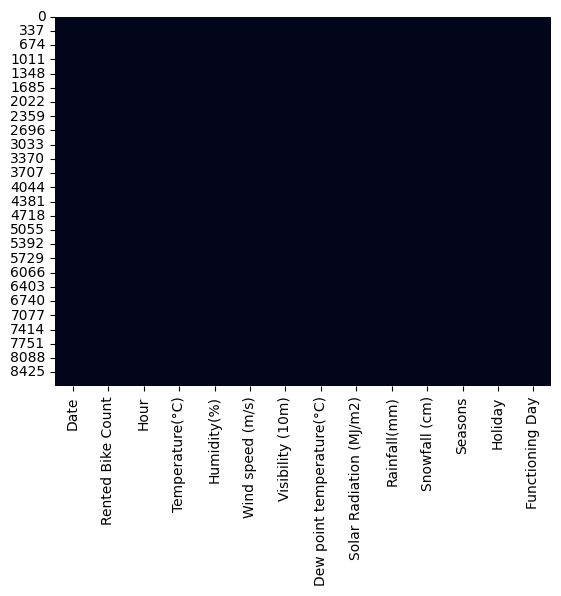

In [ ]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap

sns.heatmap(bike_df.isnull(), cbar=False);

In [ ]:
# Dataset Columns
print(f'Features: {bike_df.columns.to_list()}')

Features: ['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday', 'Functioning Day']


In [ ]:
#Looking for the description of the dataset to get insights of the data
bike_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
# Missing Values/Null Values Count
bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

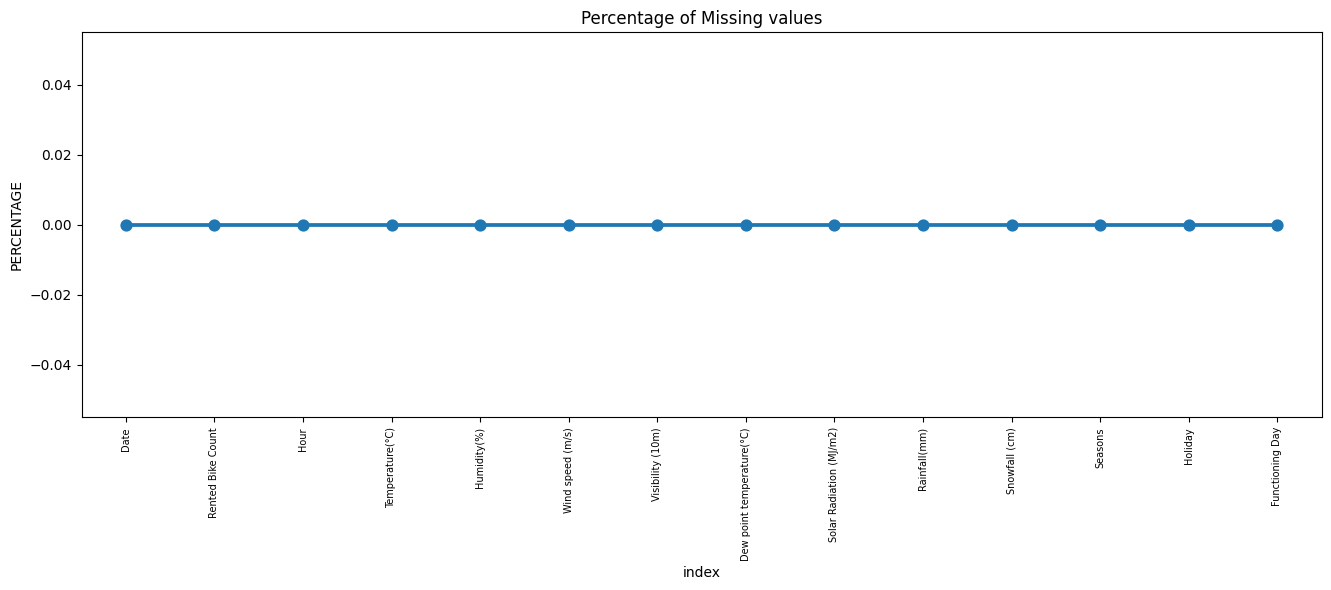

In [ ]:
# Visualizing the missing values
missing = pd.DataFrame((bike_df.isnull().sum())*100/bike_df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index', y=0, data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [ ]:
# Checking Duplicate Values
value=len(bike_df[bike_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


In [ ]:
#Rename the complex columns name
bike_df=bike_df.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

In [ ]:
# Replace hyphens with slashes in the 'Date' column
bike_df['Date'] = bike_df['Date'].str.replace('-', '/')

# Convert the 'Date' column to datetime format
bike_df['Date'] = pd.to_datetime(bike_df['Date'])

# Extract year, month, and day into separate columns
bike_df['Year'] = bike_df['Date'].dt.year
bike_df['Month'] = bike_df['Date'].dt.month
bike_df['Day'] = bike_df['Date'].dt.day


In [ ]:
# Creating a new column 'weekdays_weekend' based on whether the day is a weekend or not
bike_df['weekdays_weekend'] = bike_df['Day'].apply(lambda x: 1 if x in [5, 6] else 0)

# Dropping the columns 'Date', 'Day', and 'Year'
bike_df = bike_df.drop(columns=['Date', 'Day', 'Year'], axis=1)


In [ ]:
bike_df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0


In [ ]:
bike_df['weekdays_weekend'].value_counts()


0    8184
1     576
Name: weekdays_weekend, dtype: int64

In [ ]:
#Change the int64 column into catagory column
cols=['Hour','Month','weekdays_weekend']
for col in cols:
  bike_df[col]=bike_df[col].astype('category')


In [ ]:
#let's check the result of data type
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_Count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_Day        8760 non-null   object  
 13  Month                  8760 non-null   category
 14  weekdays_weekend       8760 non-null   c

In [ ]:
bike_df.columns

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day', 'Month',
       'weekdays_weekend'],
      dtype='object')

## **EDA**

[Text(0.5, 1.0, 'Count of Rented bikes acording to Month')]

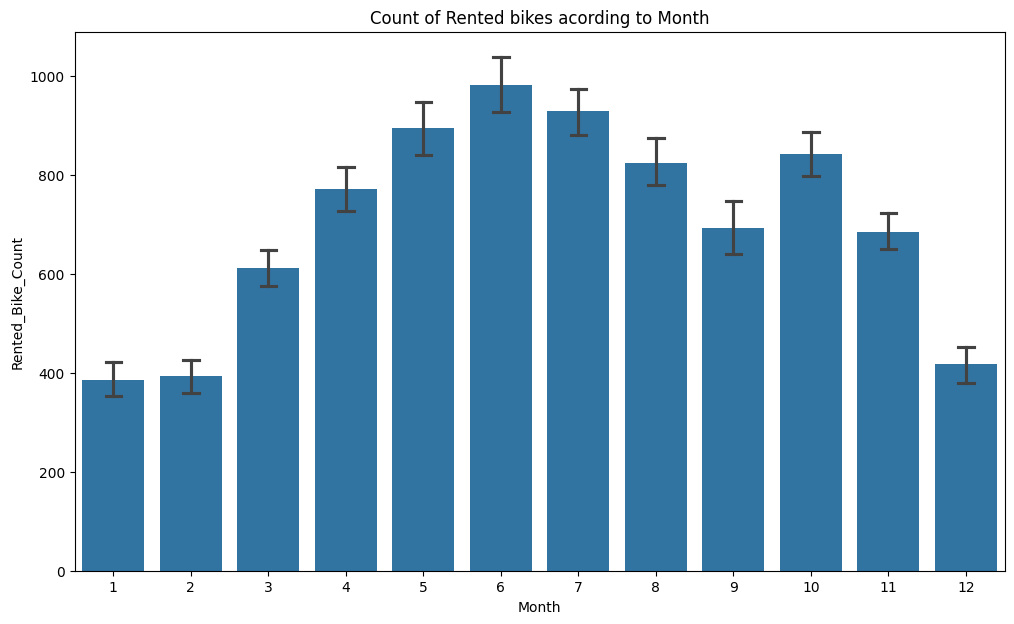

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(12,7))
sns.barplot(data=bike_df,x='Month',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Month')


**weekdays_weekend**

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekenday ')]

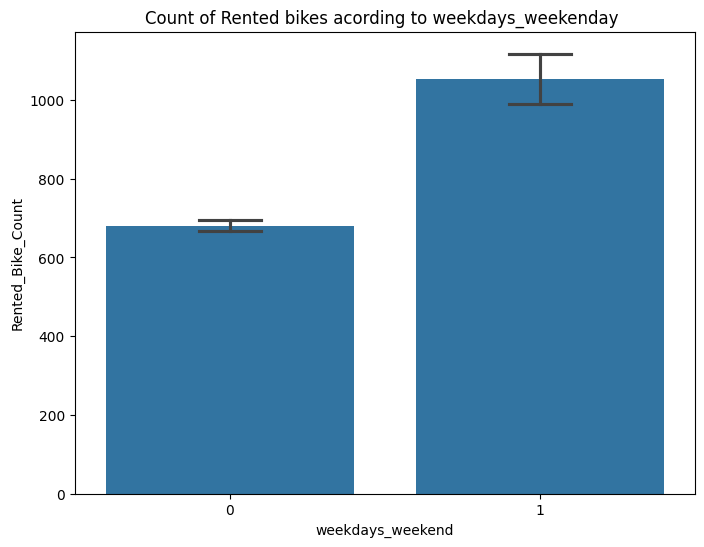

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(8,6))
sns.barplot(data=bike_df,x='weekdays_weekend',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to weekdays_weekenday ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekend ')]

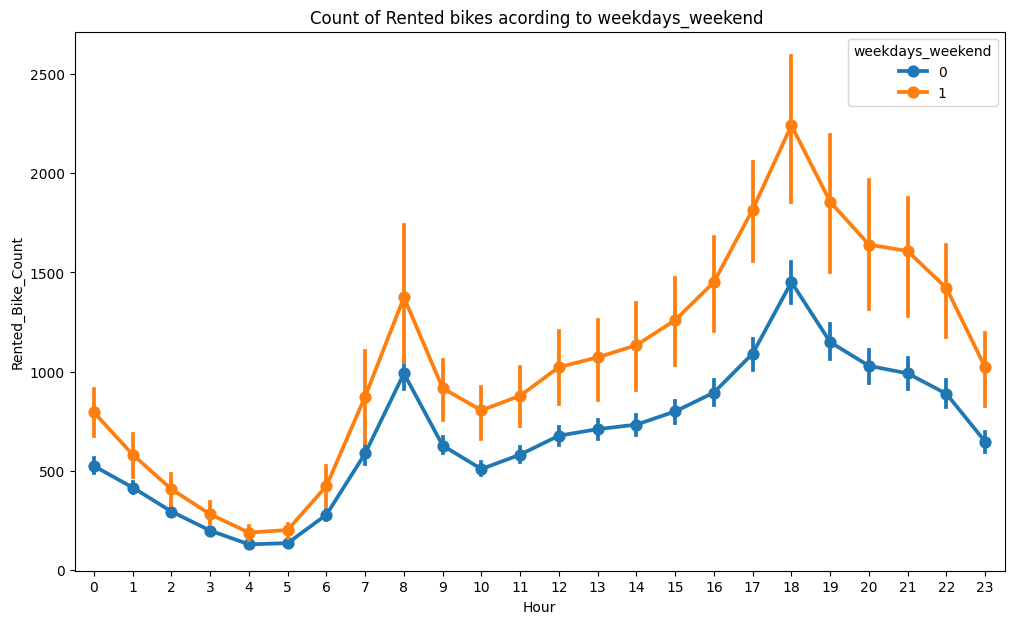

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(12,7))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='weekdays_weekend',ax=ax)
ax.set(title='Count of Rented bikes acording to weekdays_weekend ')

**HOUR**

[Text(0.5, 1.0, 'Count of Rented bikes acording to Hour ')]

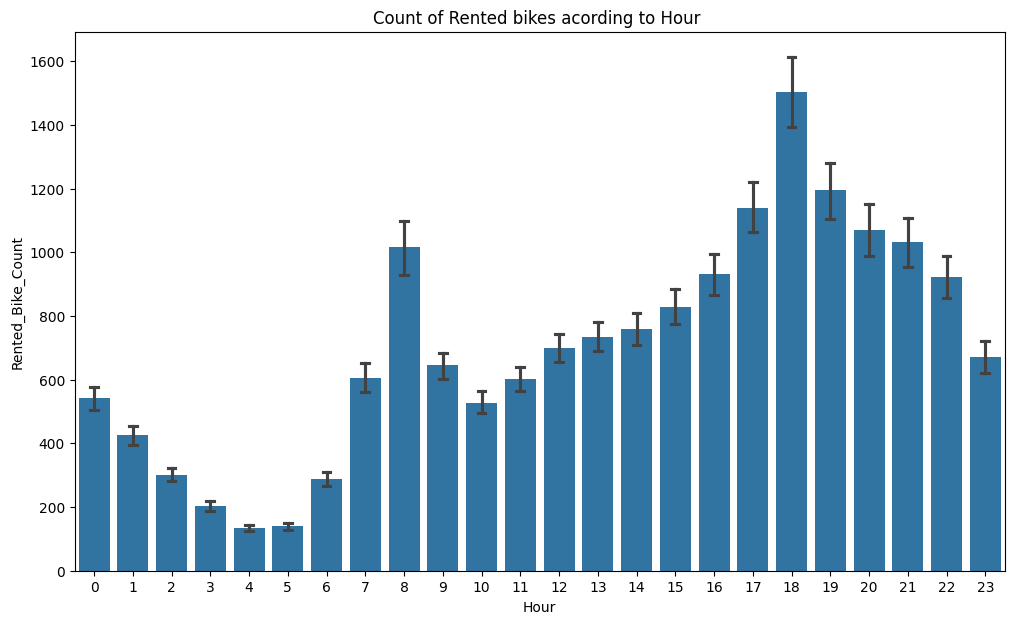

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(12,7))
sns.barplot(data=bike_df,x='Hour',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Hour ')

FUNCTIONING DAY

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

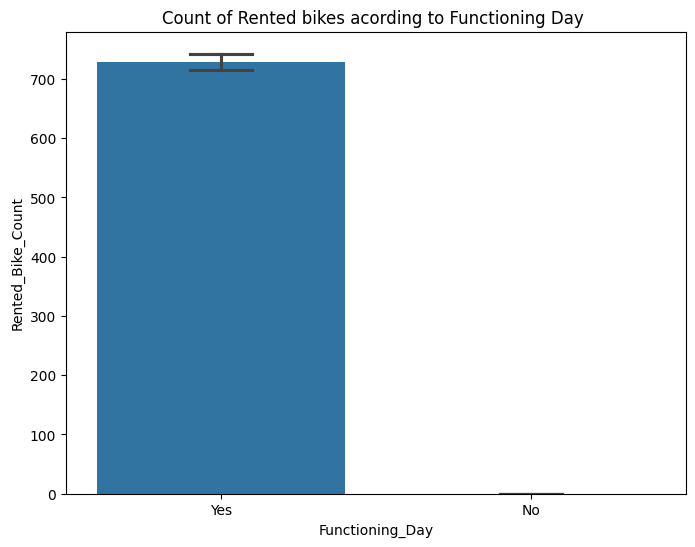

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(8,6))
sns.barplot(data=bike_df,x='Functioning_Day',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

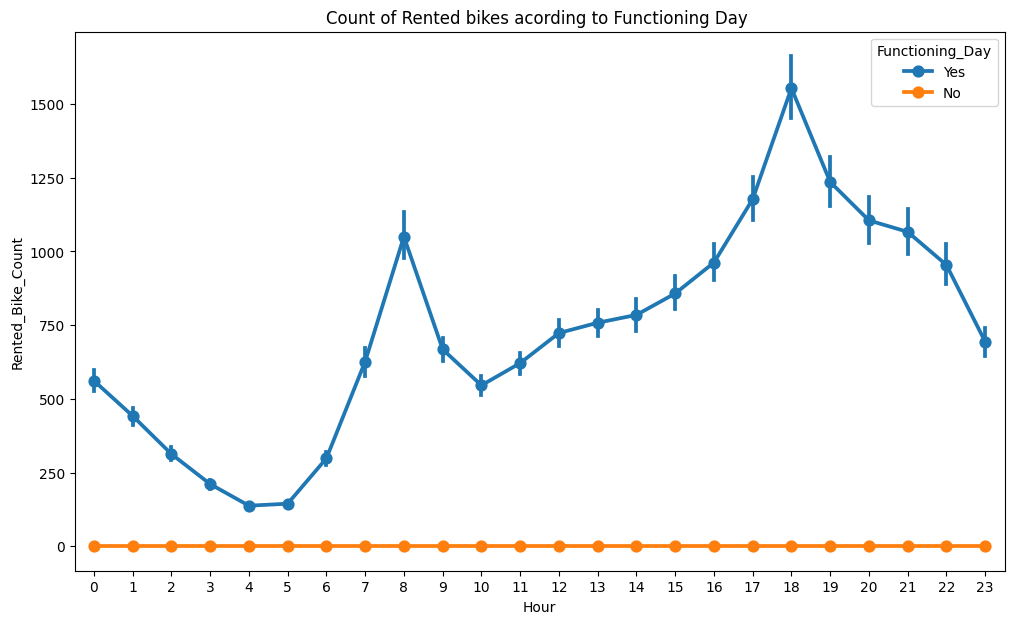

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(12,7))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='Functioning_Day',ax=ax)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

**Seasons**

[Text(0.5, 1.0, 'Count of Rented bikes acording to Seasons ')]

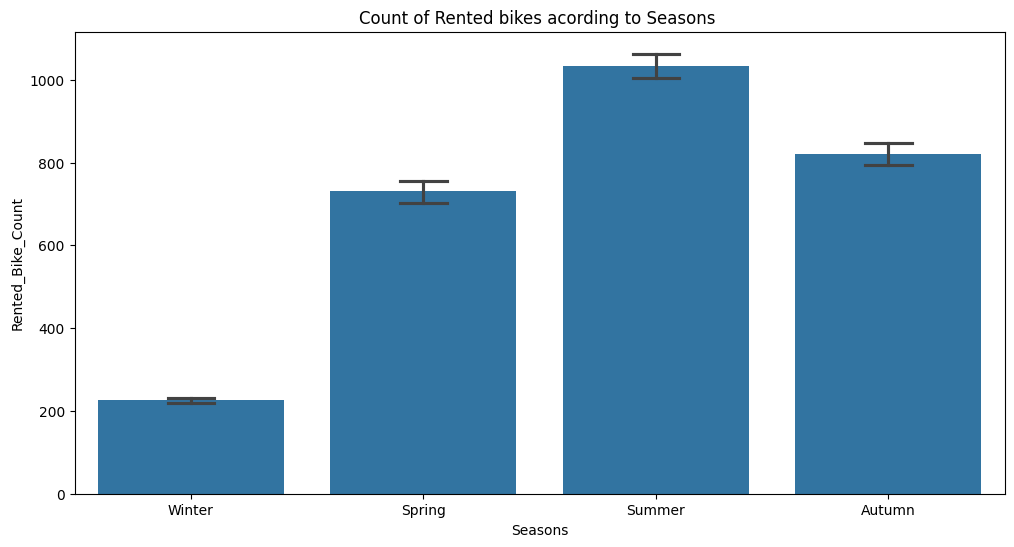

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(12,6))
sns.barplot(data=bike_df,x='Seasons',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Seasons ')

[Text(0.5, 1.0, 'Count of Rented bikes acording to seasons ')]

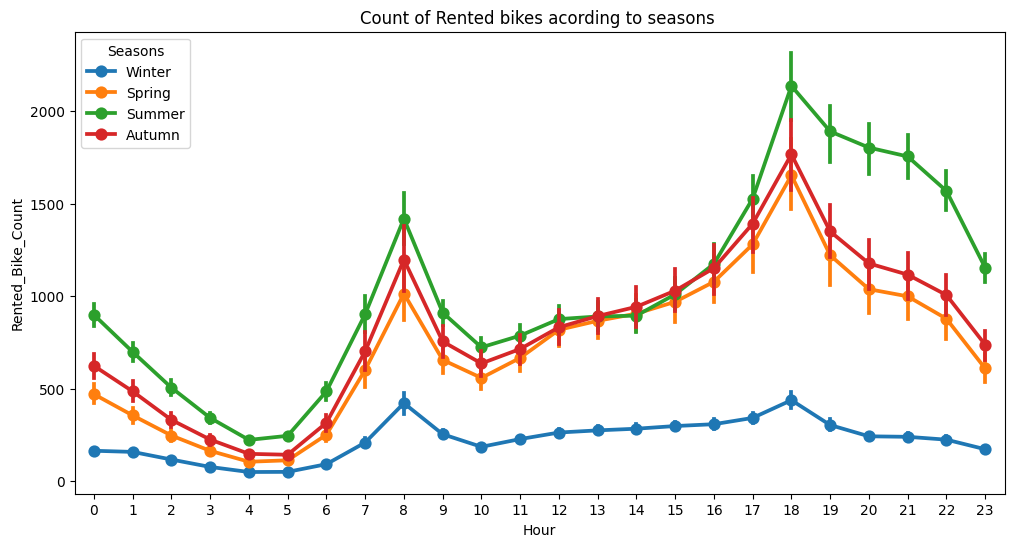

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(12,6))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='Seasons',ax=ax)
ax.set(title='Count of Rented bikes acording to seasons ')

**HOLIDAY**

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

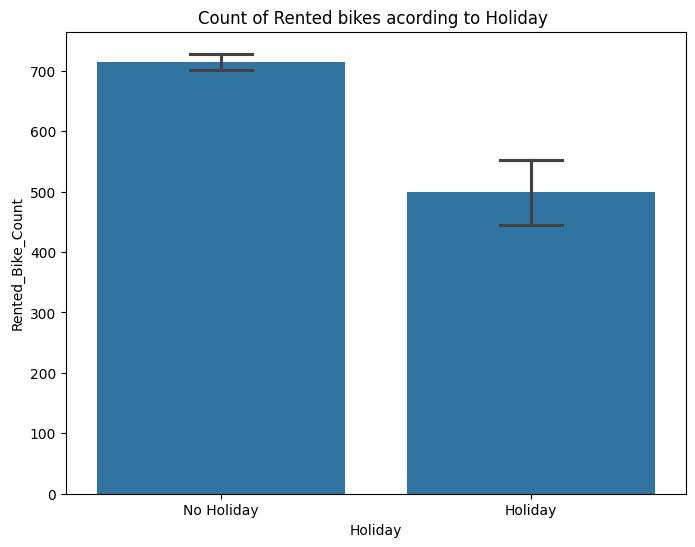

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(8,6))
sns.barplot(data=bike_df,x='Holiday',y='Rented_Bike_Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Holiday ')


[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

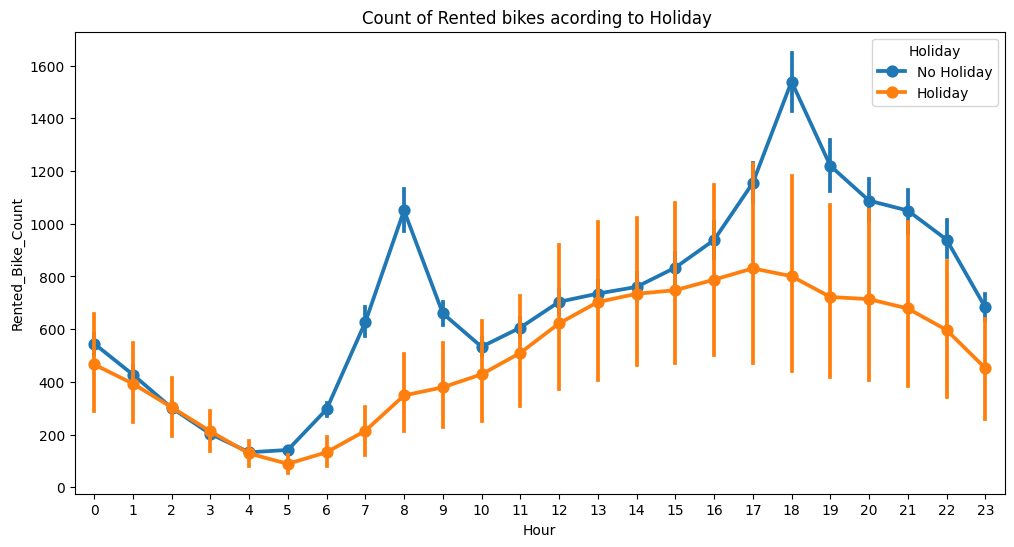

In [ ]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(12,6))
sns.pointplot(data=bike_df,x='Hour',y='Rented_Bike_Count',hue='Holiday',ax=ax)
ax.set(title='Count of Rented bikes acording to Holiday ')

*Analyze of Numerical variables*

In [ ]:
# separate numerical features from the dataframe
numeric_features= bike_df.select_dtypes(exclude=['object','category'])
numeric_features

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8755,1003,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,764,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,694,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,712,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


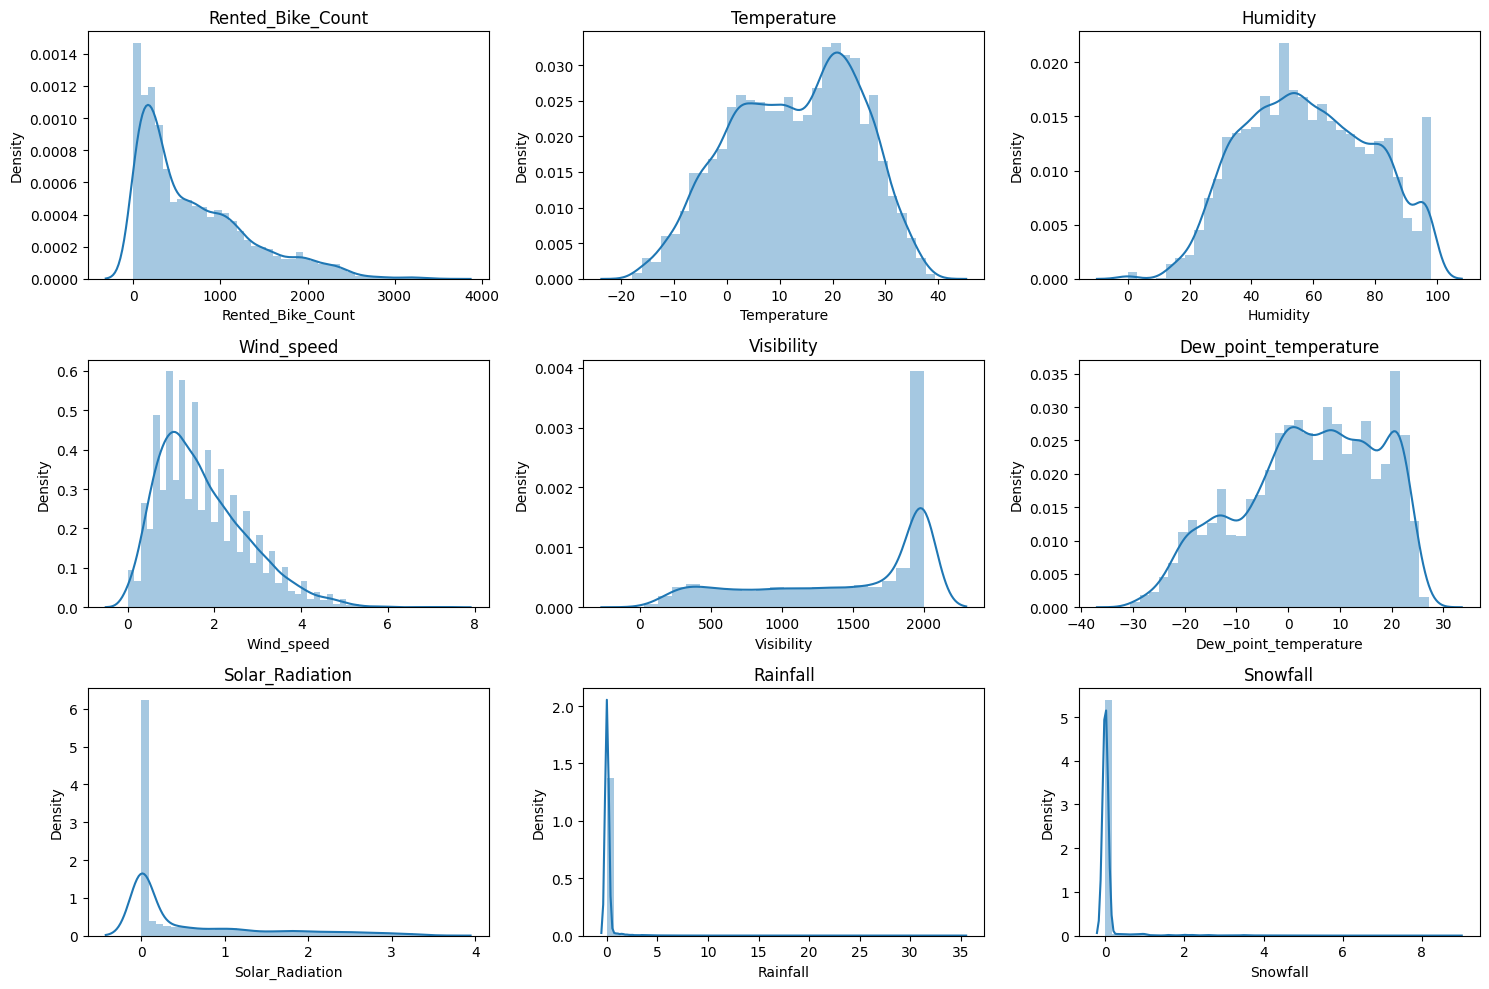

In [ ]:
# printing displots to analyze the distribution of all numerical features

n=1
plt.figure(figsize=(15,10))
for i in numeric_features.columns:
  plt.subplot(3,3,n)
  n=n+1
  sns.distplot(bike_df[i])
  plt.title(i)
  plt.tight_layout()

**Numerical VS Rented Bike Count**

<Axes: xlabel='Temperature'>

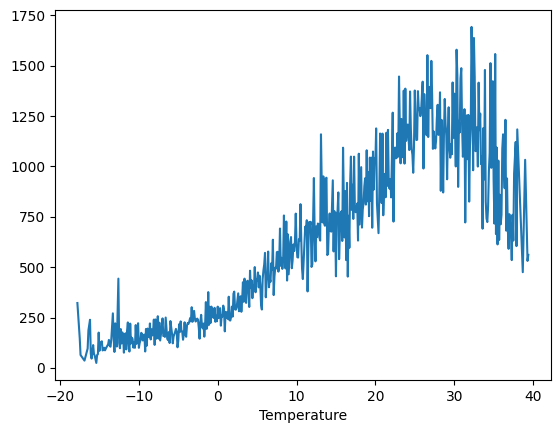

In [ ]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Temperature"
bike_df.groupby('Temperature').mean()['Rented_Bike_Count'].plot()



<Axes: xlabel='Dew_point_temperature'>

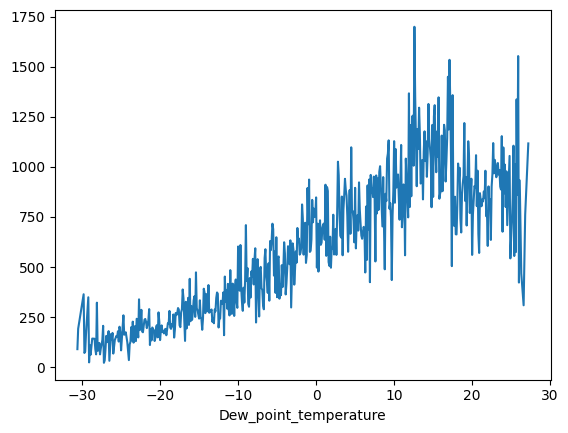

In [ ]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Dew_point_temperature"
bike_df.groupby('Dew_point_temperature').mean()['Rented_Bike_Count'].plot()

<Axes: xlabel='Solar_Radiation'>

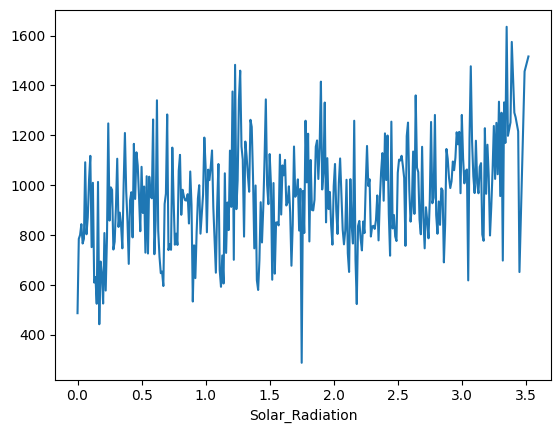

In [ ]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Solar_Radiation"
bike_df.groupby('Solar_Radiation').mean()['Rented_Bike_Count'].plot()

<Axes: xlabel='Snowfall'>

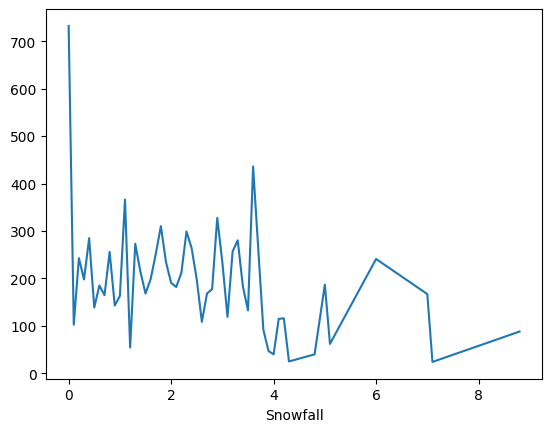

In [ ]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Snowfall"
bike_df.groupby('Snowfall').mean()['Rented_Bike_Count'].plot()

<Axes: xlabel='Rainfall'>

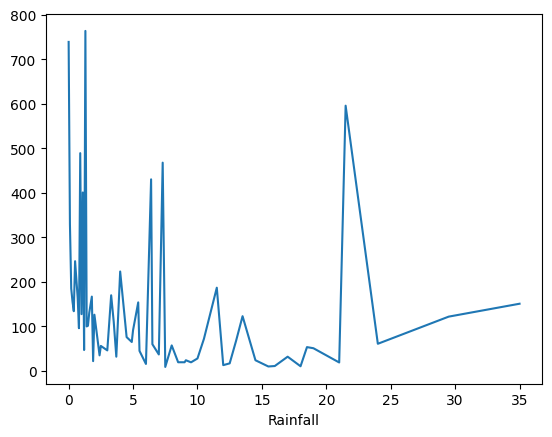

In [ ]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Rainfall"
bike_df.groupby('Rainfall').mean()['Rented_Bike_Count'].plot()

<Axes: xlabel='Wind_speed'>

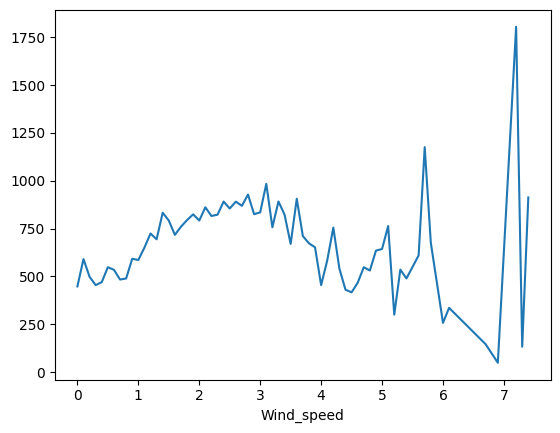

In [ ]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Wind_speed"
bike_df.groupby('Wind_speed').mean()['Rented_Bike_Count'].plot()

**REGRESSION PLOT**

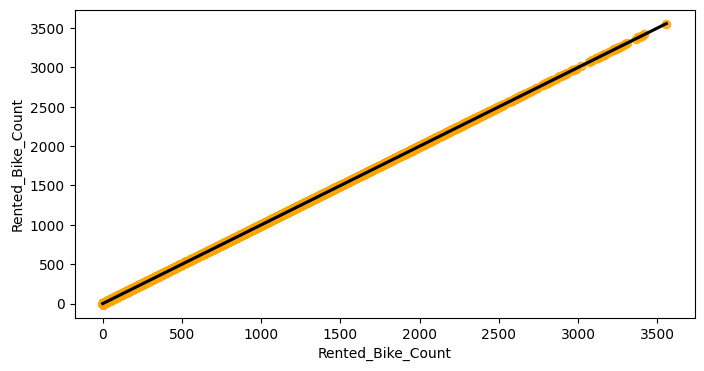

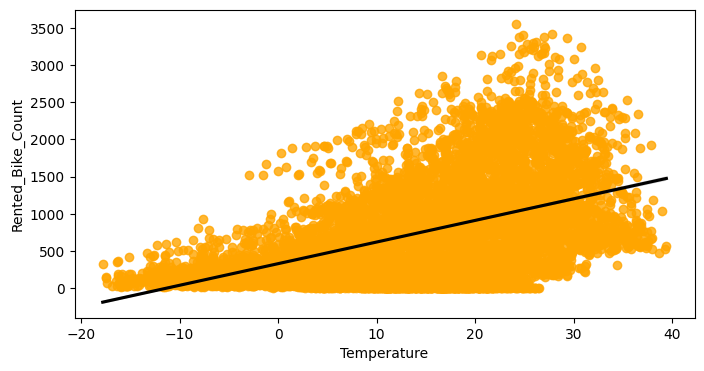

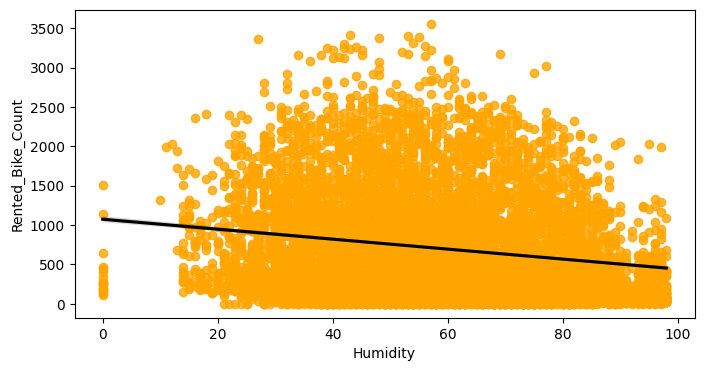

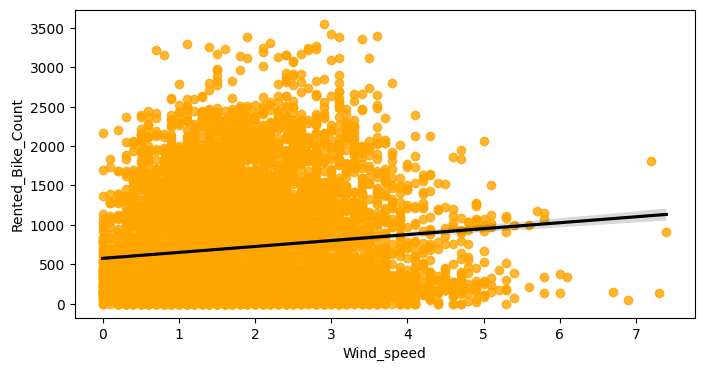

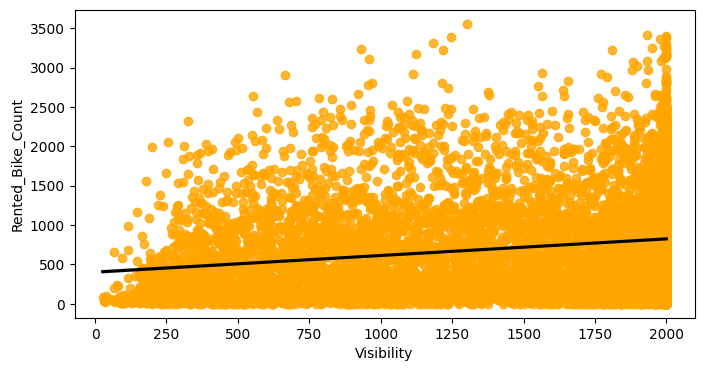

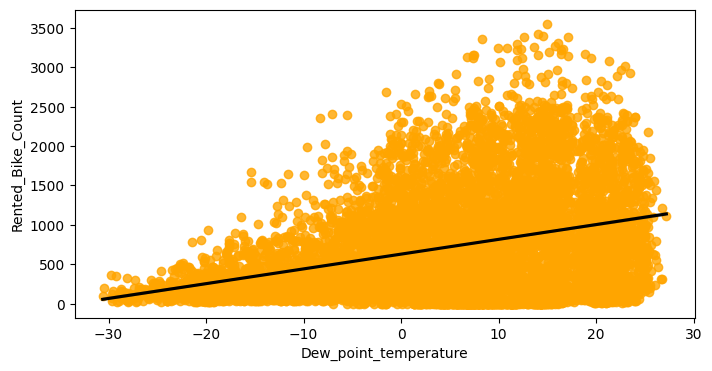

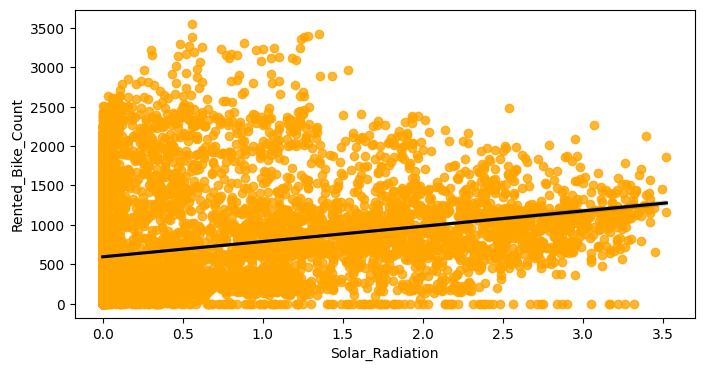

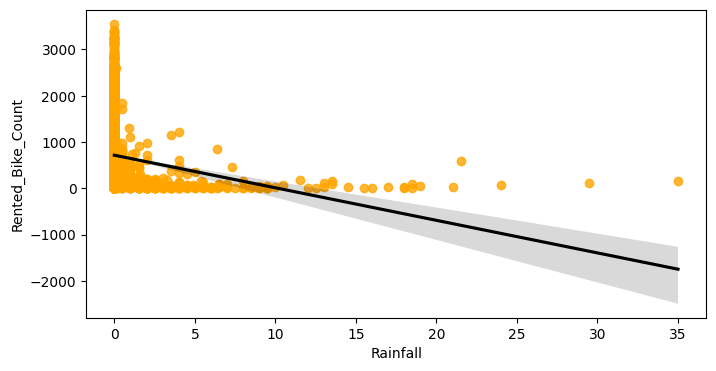

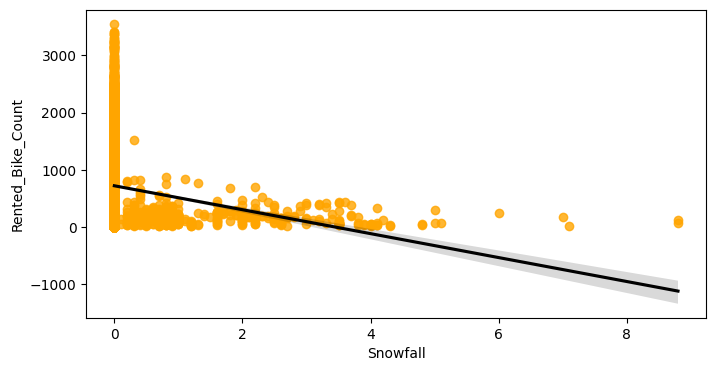

In [ ]:
#printing the regression plot for all the numerical features
for col in numeric_features:
  fig,ax=plt.subplots(figsize=(8,4))
  sns.regplot(x=bike_df[col],y=bike_df['Rented_Bike_Count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"})

# Normalise Rented_Bike_Count column data

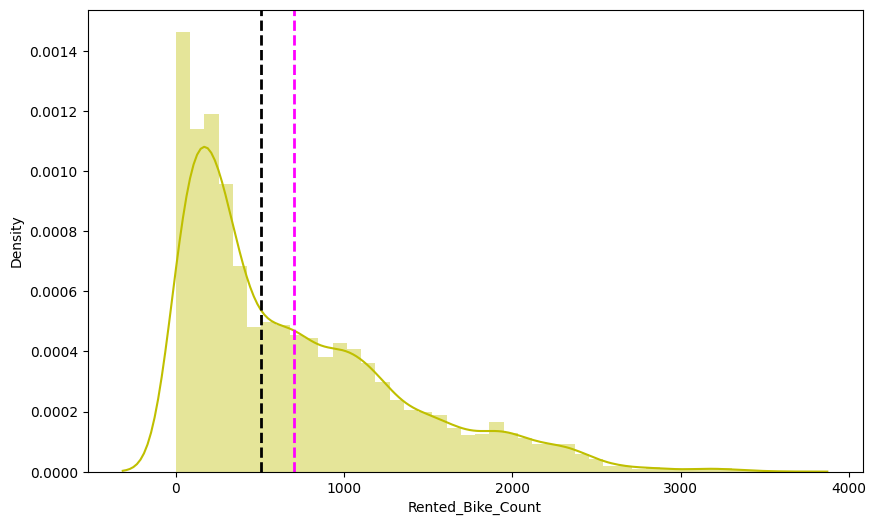

In [ ]:
#Distribution plot of Rented Bike Count
plt.figure(figsize=(10,6))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')
ax=sns.distplot(bike_df['Rented_Bike_Count'],hist=True ,color="y")
ax.axvline(bike_df['Rented_Bike_Count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(bike_df['Rented_Bike_Count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

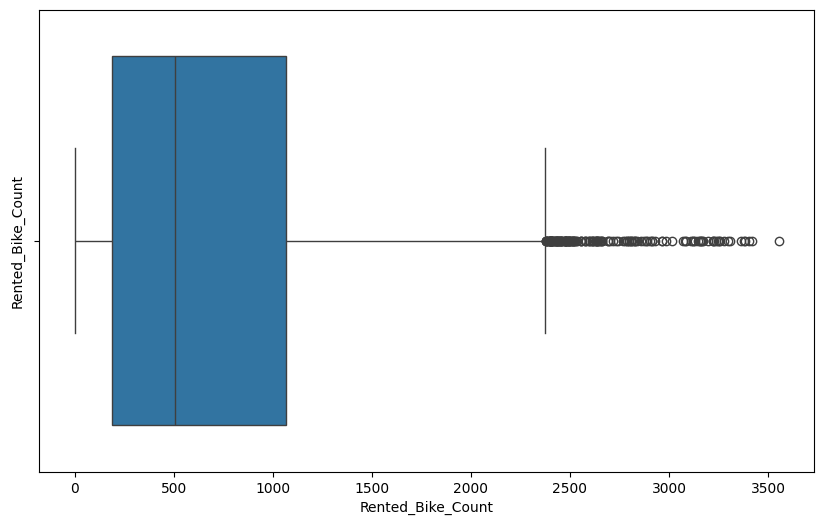

In [ ]:
# Boxplot for Rented bike Count to check outliers
plt.figure(figsize=(10,6))

plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=bike_df['Rented_Bike_Count'])
plt.show()





In [ ]:
# outliers treatments
bike_df.loc[bike_df['Rainfall']>=4,'Rainfall']= 4
bike_df.loc[bike_df['Solar_Radiation']>=2.5,'Solar_Radiation']=2.5
bike_df.loc[bike_df['Snowfall']>2,'Snowfall']= 2
bike_df.loc[bike_df['Wind_speed']>=4,'Wind_speed']= 4


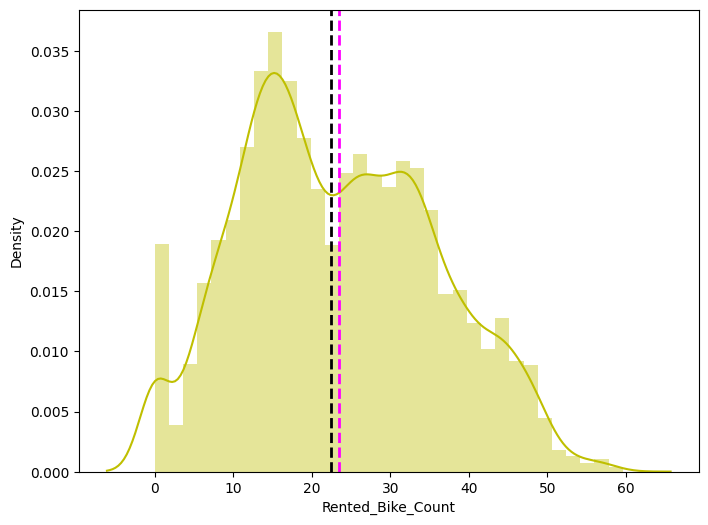

In [ ]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(8,6))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(bike_df['Rented_Bike_Count']), color="y")
ax.axvline(np.sqrt(bike_df['Rented_Bike_Count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(bike_df['Rented_Bike_Count']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()


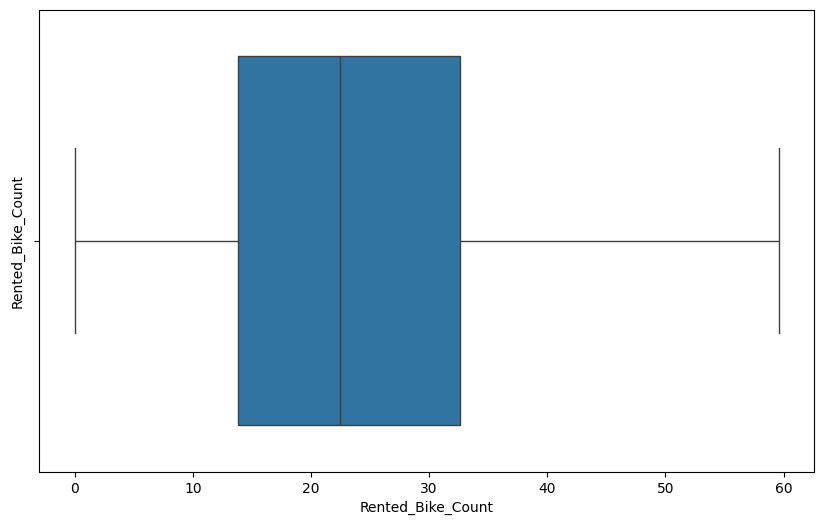

In [ ]:
#After applying sqrt on Rented Bike Count check wheater we still have outliers
plt.figure(figsize=(10,6))

plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=np.sqrt(bike_df['Rented_Bike_Count']))
plt.show()


In [ ]:
bike_df.corr()

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
Rented_Bike_Count,1.000000,0.538558,-0.199780,0.131549,0.199280,0.379788,0.265658,-0.174224,-0.160917
Temperature,0.538558,1.000000,0.159371,-0.031368,0.034794,0.912798,0.350679,0.061274,-0.263134
Humidity,-0.199780,0.159371,1.000000,-0.341432,-0.543090,0.536894,-0.467236,0.331631,0.087086
Wind_speed,0.131549,-0.031368,-0.341432,1.000000,0.173683,-0.174233,0.342995,-0.038813,0.008140
Visibility,0.199280,0.034794,-0.543090,0.173683,1.000000,-0.176630,0.151105,-0.238378,-0.109306
Dew_point_temperature,0.379788,0.912798,0.536894,-0.174233,-0.176630,1.000000,0.090541,0.168386,-0.195743
Solar_Radiation,0.265658,0.350679,-0.467236,0.342995,0.151105,0.090541,1.000000,-0.105920,-0.080470
Rainfall,-0.174224,0.061274,0.331631,-0.038813,-0.238378,0.168386,-0.105920,1.000000,-0.002297
Snowfall,-0.160917,-0.263134,0.087086,0.008140,-0.109306,-0.195743,-0.080470,-0.002297,1.000000


In [ ]:
#import the module
#assign the 'x','y' value
import statsmodels.api as sm
X = bike_df[[ 'Temperature','Humidity',
       'Wind_speed', 'Visibility','Dew_point_temperature',
       'Solar_Radiation', 'Rainfall', 'Snowfall']]
Y = bike_df['Rented_Bike_Count']
bike_df.head()


,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0


In [ ]:
#add a constant column
X = sm.add_constant(X)
X


,const,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
0,1.0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,1.0,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,1.0,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,1.0,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,1.0,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8755,1.0,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,1.0,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,1.0,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,1.0,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


In [ ]:
## fit an OLS model

model= sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented_Bike_Count   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     744.3
Date:                Tue, 19 Mar 2024   Prob (F-statistic):               0.00
Time:                        18:10:11   Log-Likelihood:                -66827.
No. Observations:                8760   AIC:                         1.337e+05
Df Residuals:                    8751   BIC:                         1.337e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   699.4173    106.562      6.563      0.000     490.531     908.304
Temperature              40.3283      4.160      9.695      0.000      32.175      48.482
Humidity                 -8.5913      1.193     -7.203      0.000     -10.929      -6.253
Wind_speed               62.4552      5.951     10.495      0.000      50.790      74.121
Visibility               -0.0137      0.011     -1.254      0.210      -0.035       0.008
Dew_point_temperature    -5.0068      4.394     -1.139      0.255     -13.621       3.607
Solar_Radiation        -124.1270      9.254    -13.413      0.000    -142.267    -105.987
Rainfall               -162.0914     11.237    -14.425      0.000    -184.118    -140.065
Snowfall                 53.2592     19.061      2.794      0.005      15.895      90.623
==============================================================================
Omnibus:                      965.203   Durbin-Watson:                   0.344
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1618.702
Skew:                           0.770   Prob(JB):                         0.00
Kurtosis:                       4.436   Cond. No.                     3.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
X.corr()

,const,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,NaN,1.000000,0.159371,-0.031368,0.034794,0.912798,0.350679,0.061274,-0.263134
Humidity,NaN,0.159371,1.000000,-0.341432,-0.543090,0.536894,-0.467236,0.331631,0.087086
Wind_speed,NaN,-0.031368,-0.341432,1.000000,0.173683,-0.174233,0.342995,-0.038813,0.008140
Visibility,NaN,0.034794,-0.543090,0.173683,1.000000,-0.176630,0.151105,-0.238378,-0.109306
Dew_point_temperature,NaN,0.912798,0.536894,-0.174233,-0.176630,1.000000,0.090541,0.168386,-0.195743
Solar_Radiation,NaN,0.350679,-0.467236,0.342995,0.151105,0.090541,1.000000,-0.105920,-0.080470
Rainfall,NaN,0.061274,0.331631,-0.038813,-0.238378,0.168386,-0.105920,1.000000,-0.002297
Snowfall,NaN,-0.263134,0.087086,0.008140,-0.109306,-0.195743,-0.080470,-0.002297,1.000000


HEATMAPS

<Axes: >

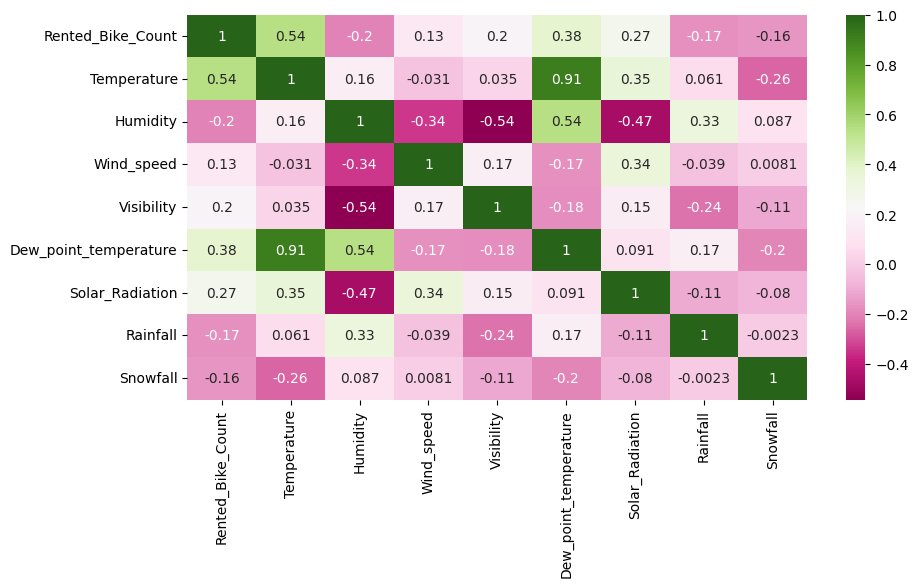

In [ ]:
#checking correlation using heatmap

plt.figure(figsize=(10,5))
sns.heatmap(bike_df.corr(),cmap='PiYG',annot=True)


In [ ]:
# drop the Dew point temperature column
bike_df=bike_df.drop(['Dew_point_temperature'],axis=1)

In [ ]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rented_Bike_Count  8760 non-null   int64   
 1   Hour               8760 non-null   category
 2   Temperature        8760 non-null   float64 
 3   Humidity           8760 non-null   int64   
 4   Wind_speed         8760 non-null   float64 
 5   Visibility         8760 non-null   int64   
 6   Solar_Radiation    8760 non-null   float64 
 7   Rainfall           8760 non-null   float64 
 8   Snowfall           8760 non-null   float64 
 9   Seasons            8760 non-null   object  
 10  Holiday            8760 non-null   object  
 11  Functioning_Day    8760 non-null   object  
 12  Month              8760 non-null   category
 13  weekdays_weekend   8760 non-null   category
dtypes: category(3), float64(5), int64(3), object(3)
memory usage: 779.8+ KB


In [ ]:
#Assign all categorical features to a variable
categorical_features=list(bike_df.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'Month',
       'weekdays_weekend'],
      dtype='object')

In [ ]:
#creat a copy
bike_df_copy = bike_df

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in categorical_features:
    bike_df_copy = one_hot_encoding(bike_df_copy, col)
bike_df_copy.head()

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,...,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,weekdays_weekend_1
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0



##Model Training

In [ ]:
#Assign the value in X and Y
X = bike_df_copy.drop(columns=['Rented_Bike_Count'], axis=1)
y = np.sqrt(bike_df_copy['Rented_Bike_Count'])

In [ ]:
X.head()

,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,Hour_3,...,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,weekdays_weekend_1
0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented_Bike_Count, dtype: float64

In [ ]:
#Create test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)


(6570, 47)
(2190, 47)


In [ ]:
bike_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rented_Bike_Count    8760 non-null   int64  
 1   Temperature          8760 non-null   float64
 2   Humidity             8760 non-null   int64  
 3   Wind_speed           8760 non-null   float64
 4   Visibility           8760 non-null   int64  
 5   Solar_Radiation      8760 non-null   float64
 6   Rainfall             8760 non-null   float64
 7   Snowfall             8760 non-null   float64
 8   Hour_1               8760 non-null   uint8  
 9   Hour_2               8760 non-null   uint8  
 10  Hour_3               8760 non-null   uint8  
 11  Hour_4               8760 non-null   uint8  
 12  Hour_5               8760 non-null   uint8  
 13  Hour_6               8760 non-null   uint8  
 14  Hour_7               8760 non-null   uint8  
 15  Hour_8               8760 non-null   u

In [ ]:
bike_df_copy.describe().columns

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Hour_1',
       'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8',
       'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14',
       'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20',
       'Hour_21', 'Hour_22', 'Hour_23', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_No Holiday', 'Functioning_Day_Yes',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'weekdays_weekend_1'],
      dtype='object')

##**Linear Regressor**

In [ ]:
#import the packages
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)



In [ ]:
#check the score
reg.score(X_train, y_train)


0.7801296434432069

In [ ]:
#check the coefficeint
reg.coef_

array([ 4.65559979e-01, -1.11601543e-01, -7.29985806e-02,  3.85477296e-04,
        9.32359625e-01, -5.14044689e+00,  8.10934354e-02, -2.18643102e+00,
       -5.11291737e+00, -7.20438392e+00, -9.77189075e+00, -9.34058424e+00,
       -4.23557891e+00,  1.86174917e+00,  7.21591987e+00,  1.40834489e+00,
       -3.09200327e+00, -3.15996487e+00, -2.04959455e+00, -2.39548435e+00,
       -2.51568090e+00, -1.22256303e+00,  6.84579567e-01,  4.40699814e+00,
        1.06780756e+01,  7.19223702e+00,  6.18040442e+00,  6.29641154e+00,
        5.08246710e+00,  1.42618575e+00, -3.48597145e+00, -4.15652305e+00,
       -7.03521167e+00,  3.09822830e+00,  2.81425019e+01, -6.05989036e-01,
        1.97801367e-01,  8.90199191e-01,  2.01386336e+00,  4.70313399e+00,
       -1.14766767e-01, -4.44588750e-01,  1.75772583e-02,  1.84303366e+00,
        5.77952799e-01,  1.12119714e+00,  4.00594371e+00])

In [ ]:
#get the X_train and X-test value
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 33.8579854539169
RMSE : 5.818761505158714
MAE : 4.425393261833649
R2 : 0.7801296434432069
Adjusted R2 : 0.7753052238548925


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error(y_test, y_pred_test)
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE_lr)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score((y_test), (y_pred_test))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )


MSE : 33.518194343241866
RMSE : 5.789489989907735
MAE : 4.433122782965774
R2 : 0.7878144109540246
Adjusted R2 : 0.7831586113811204


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])



**Heteroscedasticity**

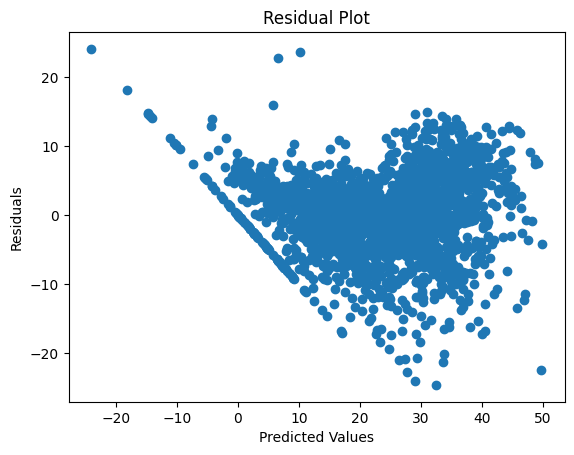

In [ ]:
### Heteroscadacity - Residual plot
plt.scatter((y_pred_test),(y_test)-(y_pred_test))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

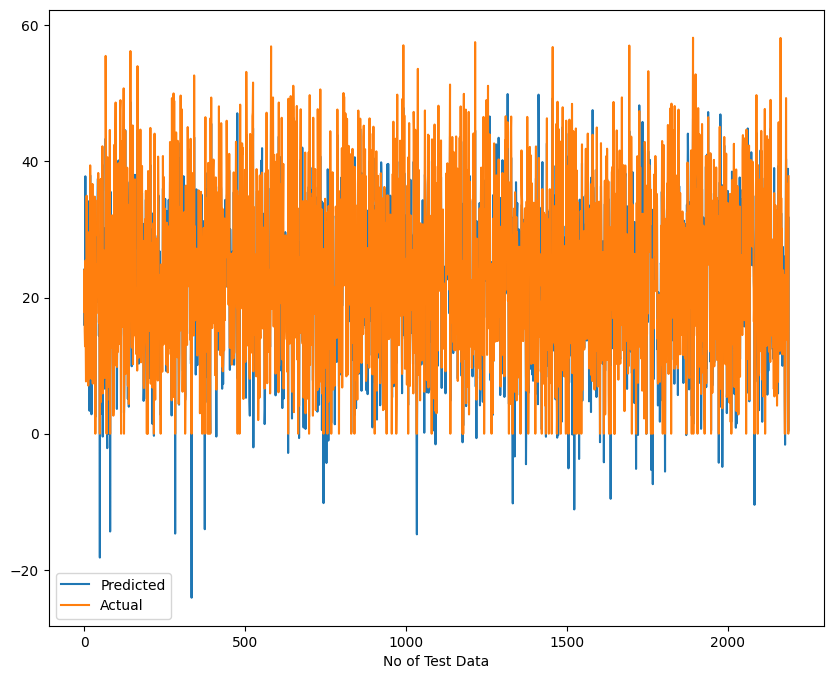

In [ ]:
# Actual Price vs predicte for Linear Regression plot
plt.figure(figsize=(10,8))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

##**Lasso Regression**

Lasso regression analysis is a shrinkage and variable selection method for linear regression models. The goal of lasso regression is to obtain the subset of predictors that minimizes prediction error for a quantitative response variable. It uses the Linear regression model with L1 regularization.


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [ ]:
# Create an instance of Lasso Regression implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0, max_iter=3000)
# Fit the Lasso model
lasso.fit(X_train, y_train)
# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.38086483341841226 0.3983632039954085


In [ ]:
#get the X_train and X-test value
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 92.6464586070881
RMSE : 9.625303039753508
MAE : 7.304643598875601
R2 : 0.3983632039954085
Adjusted R2 : 0.38516202313069525


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2_l)
Adjusted_R2_l=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 97.80255544932679
RMSE : 9.8895174528046
MAE : 7.505550890266117
R2 : 0.38086483341841226
Adjusted R2 : 0.3672797013785736


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

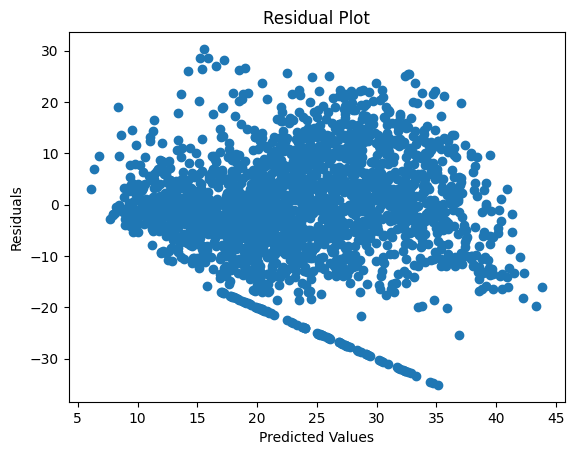

In [ ]:
### Heteroscadacity- Residual plot
plt.scatter((y_pred_test_lasso),(y_test-y_pred_test_lasso))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

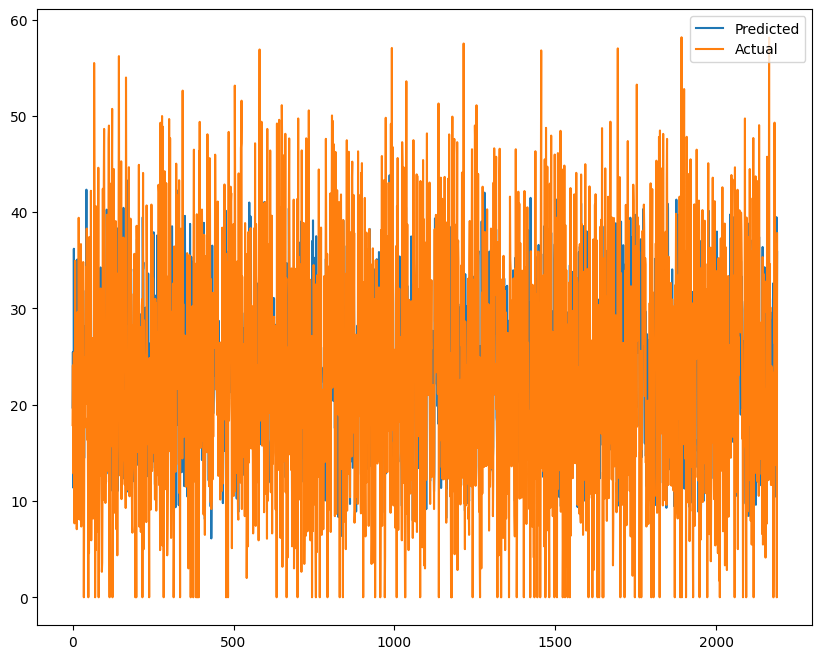

In [ ]:
#Plot the figure
plt.figure(figsize=(10,8))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

##**RIDGE REGRESSION**

Ridge regression is a method of estimating the coefficients of regression models in scenarios where the independent variables are highly correlated. It uses the linear regression model with the L2 regularization method.

In [ ]:
#import the packages
from sklearn.linear_model import Ridge

ridge= Ridge(alpha=0.1)




In [ ]:
#FIT THE MODEL
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [ ]:
#check the score
ridge.score(X_train, y_train)

In [ ]:
#get the X_train and X-test value
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [ ]:
y_pred_train_ridge


array([21.78791349, 30.35915574, 20.92800941, ..., 32.63810517,
       22.44621782, 23.94767621])

In [ ]:
y_pred_test_ridge

array([16.01543279, 24.17772255, 20.99454433, ..., 38.91929917,
        0.36831947, 31.73086326])

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 33.85799860153525
RMSE : 5.818762634919493
MAE : 4.4255165897936255
R2 : 0.7801295580638941
Adjusted R2 : 0.7753051366021775


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error(y_test, y_pred_test_ridge)
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score((y_test), (y_pred_test_ridge))
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 33.52029062677947
RMSE : 5.789671029236417
MAE : 4.433412556686299
R2 : 0.7878011405149108
Adjusted R2 : 0.7831450497605694


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
test_df=test_df.append(dict2,ignore_index=True)



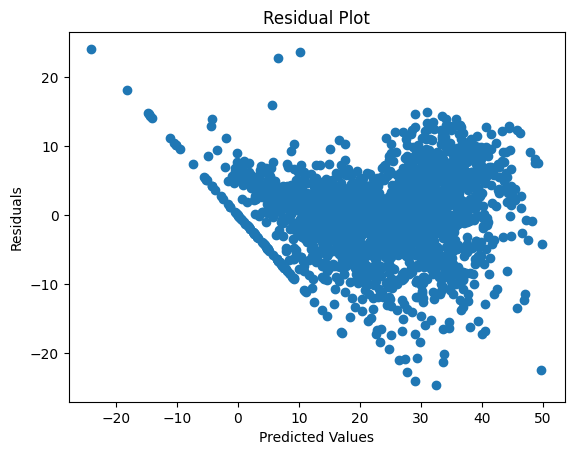

In [ ]:
### Heteroscadacity - Residual plot
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

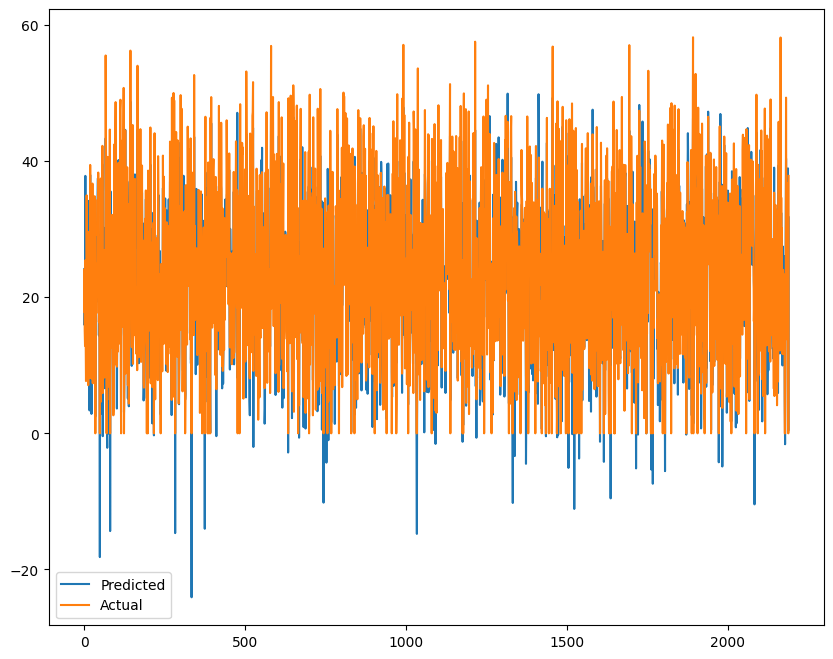

In [ ]:
#Plot the figure
plt.figure(figsize=(10,8))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# ELASTIC NET REGRESSION
**

Elastic Net regression is a linear regression model that combines both L1 (Lasso) and L2 (Ridge) regularization penalties to overcome some of the limitations of each individual method.

The model introduces two hyperparameters, alpha and l1_ratio, which control the strength of the L1 and L2 penalties, respectively. Elastic Net regression is particularly useful when dealing with datasets that have high dimensionality and multicollinearity between features.




In [ ]:
#import the packages
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
#FIT THE MODEL
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
#check the score
elasticnet.score(X_train, y_train)

0.6329784922233979

In [ ]:
#get the X_train and X-test value
y_pred_train_en=elasticnet.predict(X_train)
y_pred_test_en=elasticnet.predict(X_test)

In [ ]:
print(y_pred_train_en)
print(y_pred_test_en)

[16.2770444  31.28654178 17.74643057 ... 31.3291673  22.49516899
 19.83339426]
[18.97147955 24.11745443 20.1908917  ... 38.80991511 16.19976613
 33.36379774]


In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error((y_train), (y_pred_train_en))
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_train, y_pred_train_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score(y_train, y_pred_train_en)
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 56.517891116281604
RMSE : 7.517838194340285
MAE : 5.741827003710799
R2 : 0.6329784922233979
Adjusted R2 : 0.6249252658622866


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Elastic net regression ',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
training_df=training_df.append(dict1,ignore_index=True)




In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error(y_test, y_pred_test_en)
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_test, y_pred_test_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score((y_test), (y_pred_test_en))
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 59.692508187018
RMSE : 7.7260926856347
MAE : 5.885363007592796
R2 : 0.6221189637607105
Adjusted R2 : 0.6138274564295964


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Elastic net regression Test',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
test_df=test_df.append(dict2,ignore_index=True)

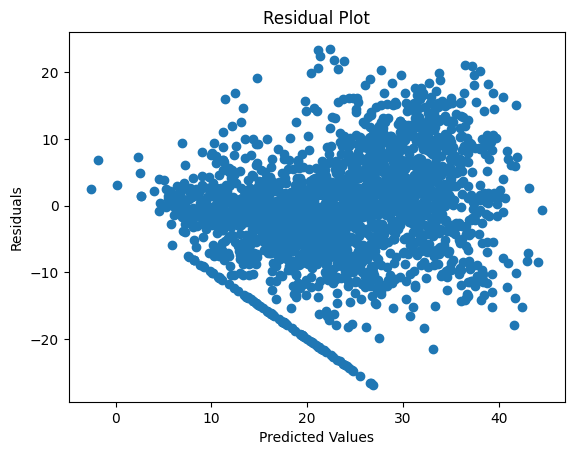

In [ ]:
### Heteroscadacity- Residual plo
plt.scatter((y_pred_test_en),(y_test)-(y_pred_test_en))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

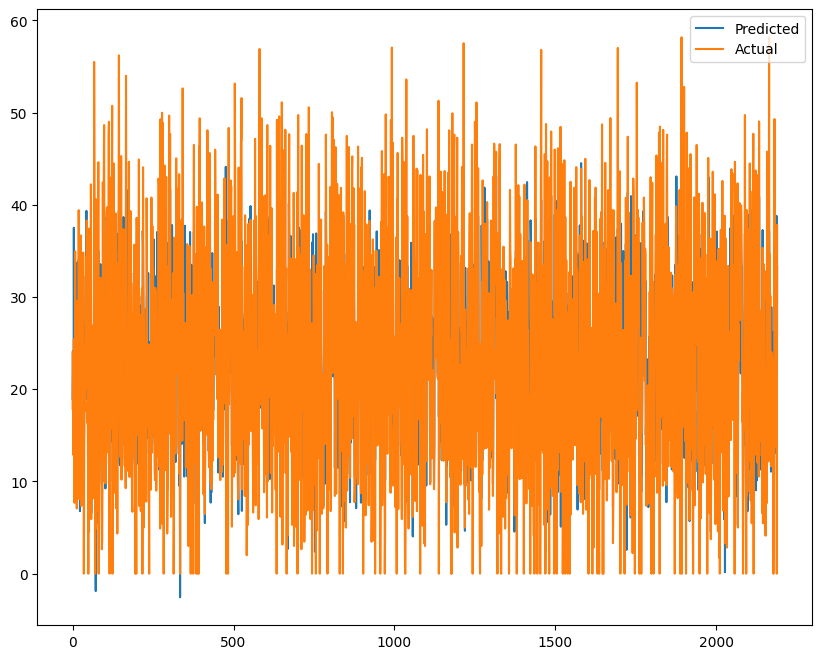

In [ ]:
#Plot the figure
plt.figure(figsize=(10,8))
plt.plot(np.array(y_pred_test_en))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# **DECISION TREE
**

A decision tree is a type of supervised machine learning algorithm that is commonly used for classification and regression tasks. It works by recursively splitting the data into subsets based on the values of certain attributes, ultimately arriving at a set of decision rules that can be used to classify or predict outcomes for new data.




In [ ]:
from sklearn.tree import DecisionTreeRegressor

decision_regressor = DecisionTreeRegressor(criterion='friedman_mse', max_depth=8,
                      max_features=9, max_leaf_nodes=100,)
decision_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=8, max_features=9,
                      max_leaf_nodes=100)

In [ ]:
#get the X_train and X-test value
y_pred_train_d = decision_regressor.predict(X_train)
y_pred_test_d = decision_regressor.predict(X_test)

In [ ]:
print(y_pred_train_d)
print(y_pred_test_d)

[20.22145868 35.00148772 15.00552918 ... 30.10338303 30.61597687
 14.29706087]
[30.61597687 30.61597687 19.10593896 ... 30.10338303  0.
 30.10338303]


In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",decision_regressor.score(X_train,y_train))

#calculate MSE
MSE_d= mean_squared_error(y_train, y_pred_train_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_train, y_pred_train_d)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score(y_train, y_pred_train_d)
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.6882064836388699
MSE : 48.01329522951823
RMSE : 6.9291626643858075
MAE : 5.010204007600365
R2 : 0.6882064836388699
Adjusted R2 : 0.6813650759502737


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_d= mean_squared_error(y_test, y_pred_test_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_test, y_pred_test_d)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score((y_test), (y_pred_test_d))
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 51.43548179079993
RMSE : 7.17185344180986
MAE : 5.130260722430478
R2 : 0.6743897392001086
Adjusted R2 : 0.6672451629827441


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

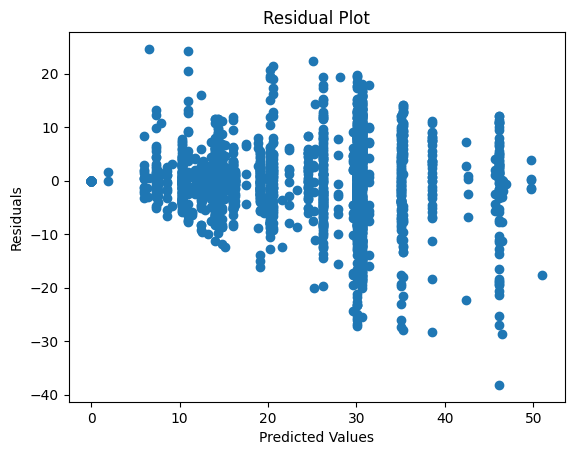

In [ ]:
## Heteroscadacity - Residual plot
plt.scatter((y_pred_test_d),(y_test)-(y_pred_test_d))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

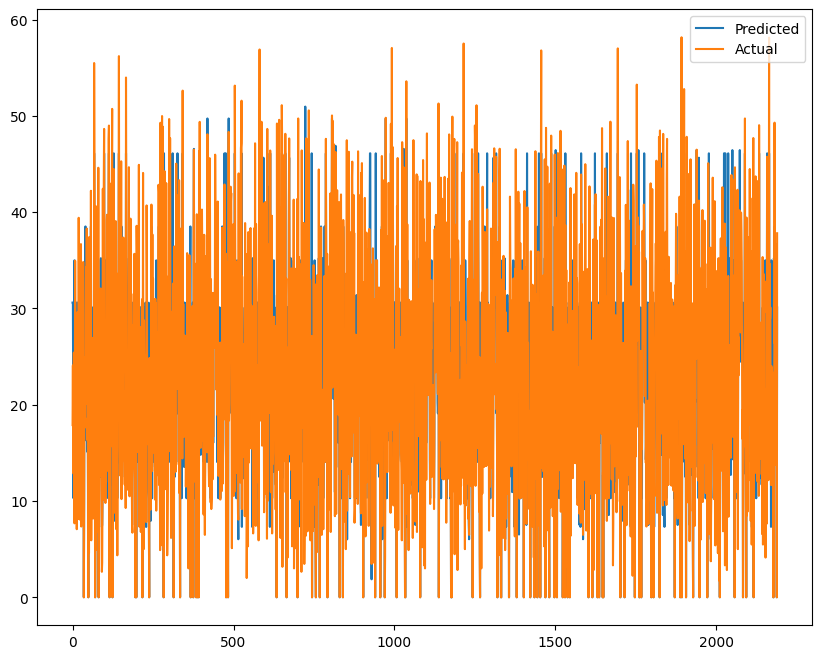

In [ ]:
#Plot the figure
plt.figure(figsize=(10,8))
plt.plot((np.array(y_pred_test_d)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# **RANDOM FOREST**

In [ ]:


#import the packages
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
# Making predictions on train and test data

y_pred_train_r = rf_model.predict(X_train)
y_pred_test_r = rf_model.predict(X_test)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_model.score(X_train,y_train))

#calculate MSE
MSE_rf= mean_squared_error(y_train, y_pred_train_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score(y_train, y_pred_train_r)
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.9843770920447739
MSE : 2.405782200836603
RMSE : 1.5510584130962326
MAE : 1.0346695650880582
R2 : 0.9843770920447739
Adjusted R2 : 0.9840342924771288


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score((y_test), (y_pred_test_r))
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 17.955296058504004
RMSE : 4.237369001928438
MAE : 2.792005882988612
R2 : 0.8863347162542865
Adjusted R2 : 0.8838406600749922


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
test_df=test_df.append(dict2,ignore_index=True)

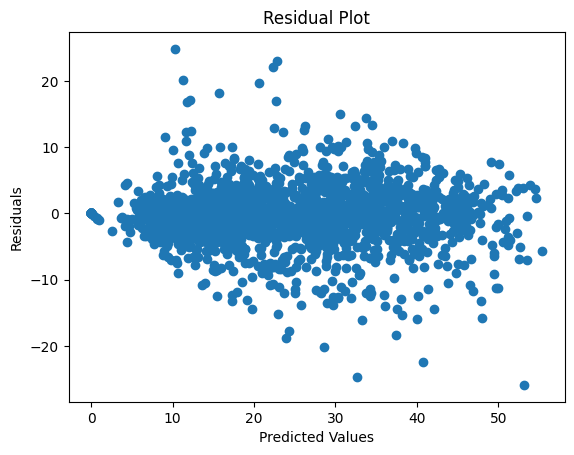

In [ ]:
### Heteroscadacity- Residual plot
plt.scatter((y_pred_test_r),(y_test)-(y_pred_test_r))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
rf_model.feature_importances_


array([3.20487494e-01, 1.58773810e-01, 1.52131072e-02, 1.67233068e-02,
       3.49908852e-02, 3.72353412e-02, 1.15515987e-03, 4.20669538e-03,
       1.32647863e-02, 2.03228359e-02, 2.82403309e-02, 2.52390195e-02,
       8.33011394e-03, 3.61106449e-03, 1.28823615e-02, 9.04324235e-04,
       2.24047790e-03, 1.11962377e-03, 2.15263750e-04, 1.74070635e-04,
       3.60394212e-04, 1.36998451e-03, 3.75641778e-03, 1.06945536e-02,
       3.11680317e-02, 1.74107920e-02, 1.21718890e-02, 1.29458598e-02,
       1.03395133e-02, 3.87349855e-03, 5.85925528e-03, 1.36004438e-03,
       1.02172934e-02, 2.63155726e-03, 1.49994816e-01, 7.54095891e-04,
       2.80613321e-03, 1.60432359e-03, 1.73002292e-03, 1.61792205e-03,
       1.06376630e-03, 2.00142220e-03, 1.65019219e-03, 1.98270025e-03,
       3.51789087e-03, 8.04438356e-04, 9.83118868e-04])

# **FEATURES STORED**

In [ ]:
importances = rf_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
0,Temperature,0.32
1,Humidity,0.16
34,Functioning_Day_Yes,0.15
5,Rainfall,0.04
11,Hour_5,0.03
10,Hour_4,0.03
24,Hour_18,0.03
4,Solar_Radiation,0.03
9,Hour_3,0.02
3,Visibility,0.02


In [ ]:
#FIT THE MODEL
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

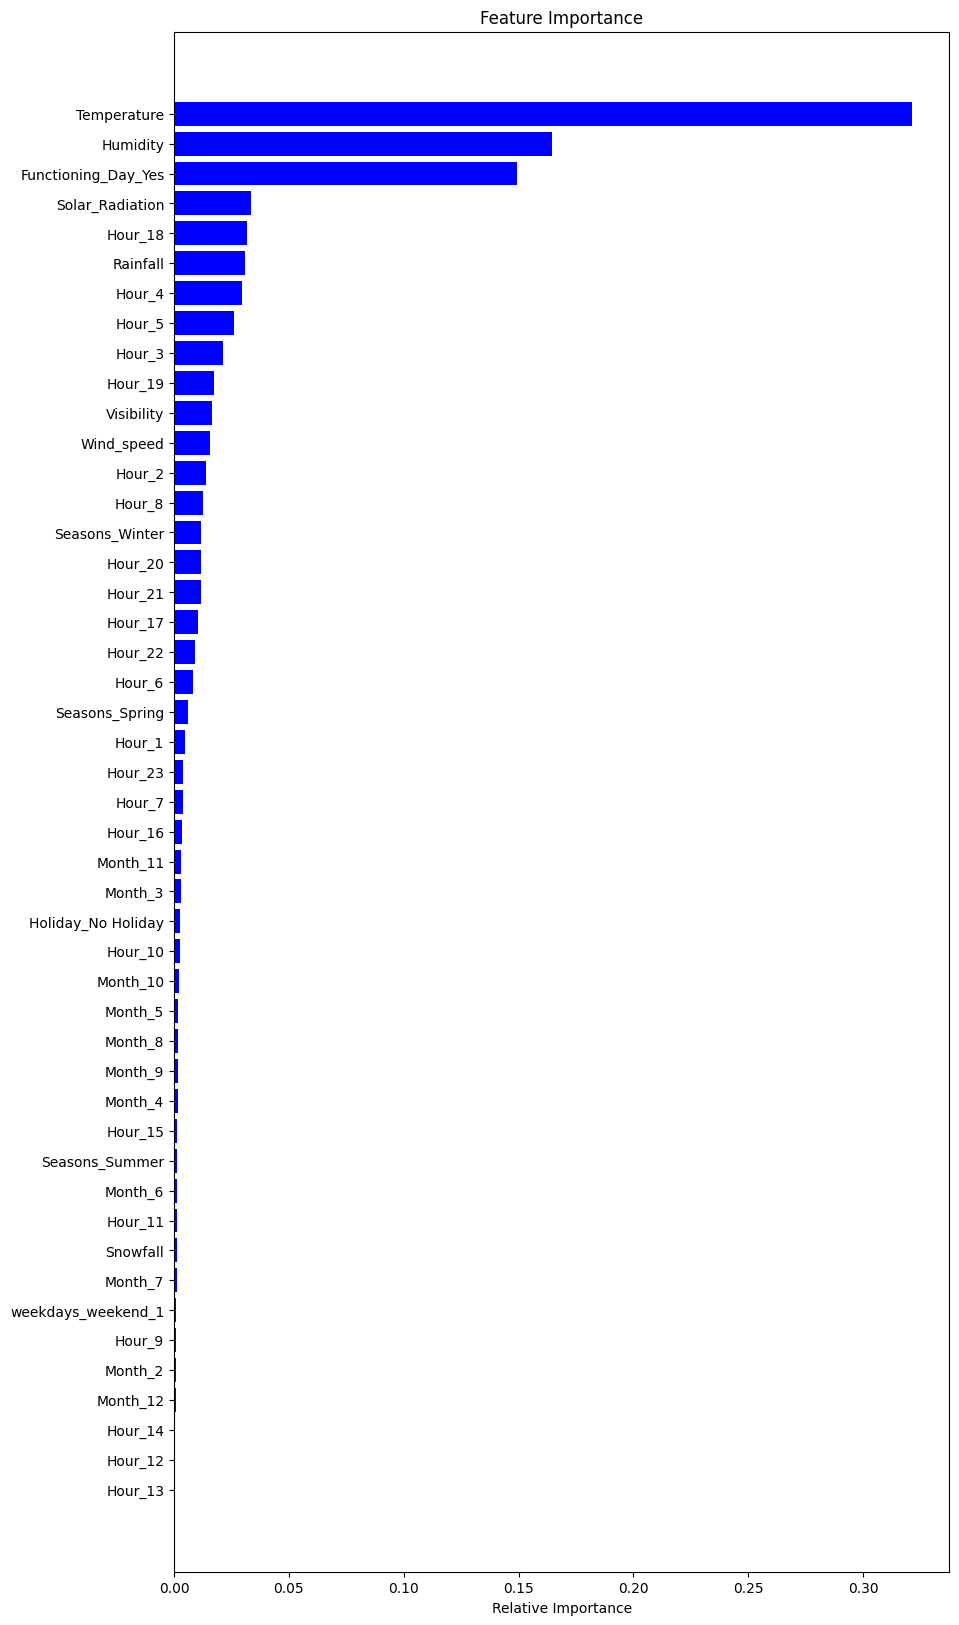

In [ ]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# **GRADIENT BOOSTING**

In [ ]:
#import the packages
from sklearn.ensemble import GradientBoostingRegressor
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()


gb_model.fit(X_train,y_train)


GradientBoostingRegressor()

In [ ]:
# Making predictions on train and test data

y_pred_train_g = gb_model.predict(X_train)
y_pred_test_g = gb_model.predict(X_test)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_model.score(X_train,y_train))
#calculate MSE
MSE_gb= mean_squared_error(y_train, y_pred_train_g)
print("MSE :",MSE_gb)

#calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)


#calculate MAE
MAE_gb= mean_absolute_error(y_train, y_pred_train_g)
print("MAE :",MAE_gb)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_gb= r2_score(y_train, y_pred_train_g)
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score(y_train, y_pred_train_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.8598577690533644
MSE : 21.58059727185198
RMSE : 4.6454921452793325
MAE : 3.495186533750197
R2 : 0.8598577690533644
Adjusted R2 : 0.8567827527814261


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Gradient boosting regression ',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_R2_gb ),2),
       }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_gb= mean_squared_error(y_test, y_pred_test_g)
print("MSE :",MSE_gb)

#calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)


#calculate MAE
MAE_gb= mean_absolute_error(y_test, y_pred_test_g)
print("MAE :",MAE_gb)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_gb= r2_score((y_test), (y_pred_test_g))
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score((y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 24.192258841981396
RMSE : 4.918562680497362
MAE : 3.7074079669219797
R2 : 0.8468518727419597
Adjusted R2 : 0.8434914796602007


In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Gradient boosting regression ',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_R2_gb ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)


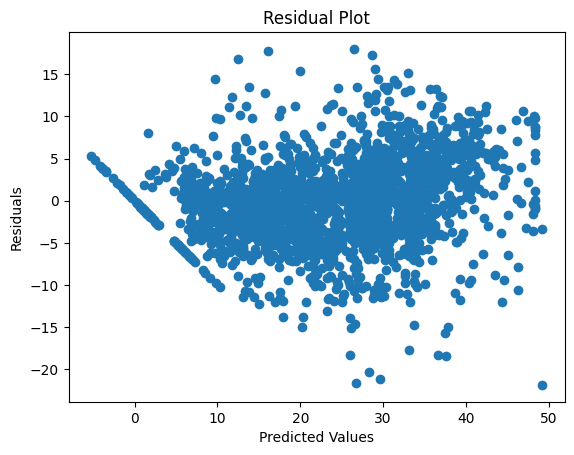

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_g),(y_test)-(y_pred_test_g))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [ ]:
gb_model.feature_importances_

array([3.25514175e-01, 1.35123147e-01, 4.98647784e-04, 1.37181545e-03,
       4.87677224e-02, 6.59028904e-02, 0.00000000e+00, 5.52818443e-04,
       6.44918583e-03, 1.46761828e-02, 2.62656250e-02, 2.28788895e-02,
       5.61369881e-03, 0.00000000e+00, 8.97548495e-03, 0.00000000e+00,
       3.23557548e-03, 1.60640068e-03, 0.00000000e+00, 0.00000000e+00,
       1.67661656e-05, 0.00000000e+00, 4.11689001e-04, 8.01097590e-03,
       3.26354839e-02, 1.85923178e-02, 1.15756776e-02, 1.68254356e-02,
       1.40458282e-02, 3.72653627e-04, 1.31972825e-03, 2.04263877e-04,
       4.23597401e-02, 2.83505858e-03, 1.75843736e-01, 9.72126710e-06,
       6.04688547e-04, 0.00000000e+00, 0.00000000e+00, 1.50306027e-03,
       1.08115181e-04, 1.06090750e-04, 0.00000000e+00, 2.35427730e-03,
       2.32880940e-03, 1.69423369e-04, 3.34200733e-04])

# **FEATURES STORED**

In [ ]:
importances = gb_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.head()

,Feature,Feature Importance
0,Temperature,0.33
1,Humidity,0.14
2,Wind_speed,0.00
3,Visibility,0.00
4,Solar_Radiation,0.05


In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
0,Temperature,0.33
34,Functioning_Day_Yes,0.18
1,Humidity,0.14
5,Rainfall,0.07
4,Solar_Radiation,0.05
32,Seasons_Winter,0.04
10,Hour_4,0.03
24,Hour_18,0.03
27,Hour_21,0.02
25,Hour_19,0.02


In [ ]:
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [ ]:
features = X_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

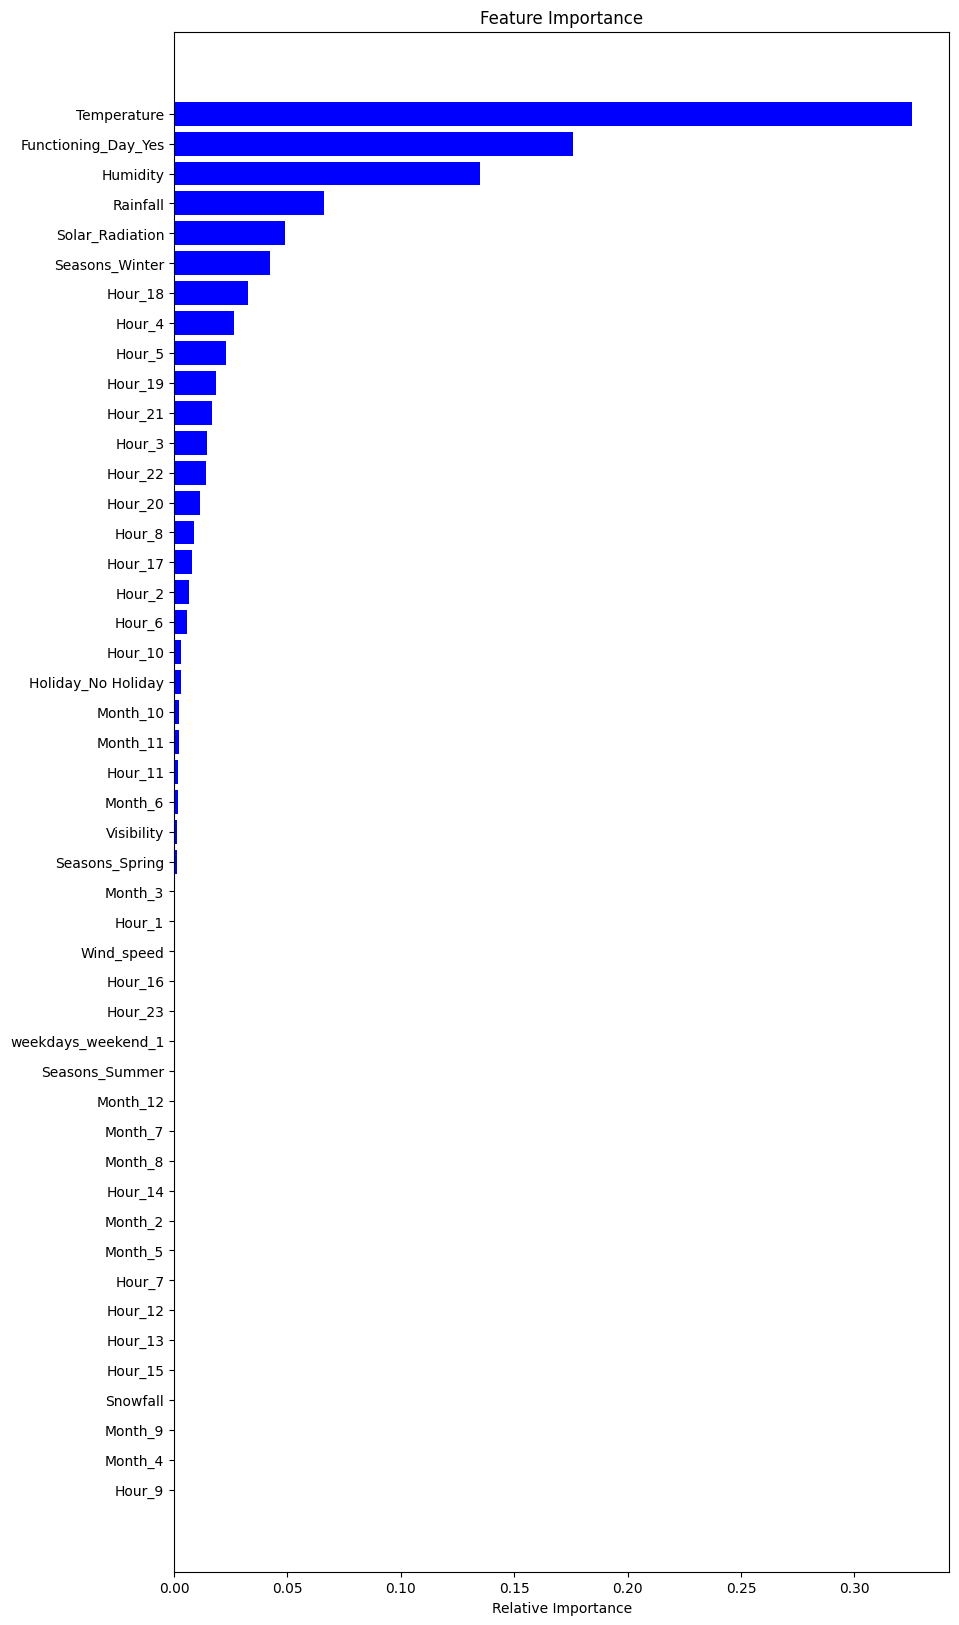

In [ ]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# **Hyperparameter tuning**

Before proceding to try next models, let us try to tune some hyperparameters and see if the performance of our model improves.

Hyperparameter tuning is the process of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a model argument whose value is set before the learning process begins. The key to machine learning algorithms is hyperparameter tuning.




**Using GridSearchCV
**

GridSearchCV helps to loop through predefined hyperparameters and fit the model on the training set. So, in the end, we can select the best parameters from the listed hyperparameters.

# **Gradient Boosting Regressor with GridSearchCV**

Provide the range of values for chosen hyperparameters

In [251]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}




In [252]:
param_dict

{'n_estimators': [50, 80, 100],
 'max_depth': [4, 6, 8],
 'min_samples_split': [50, 100, 150],
 'min_samples_leaf': [40, 50]}

# **Importing Gradient Boosting Regressor**

In [253]:


from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

# Grid search
param_dict = {'learning_rate': [0.1, 0.01],
              'n_estimators': [50, 100],
              'max_depth': [3, 5]}

gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid=param_dict,
                       cv=3, verbose=2, n_jobs=-1)

gb_grid.fit(X_train, y_train)


Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01], 'max_depth': [3, 5],
                         'n_estimators': [50, 100]},
             verbose=2)

In [254]:
gb_grid.best_estimator_

GradientBoostingRegressor(max_depth=5)

In [255]:
gb_optimal_model = gb_grid.best_estimator_

In [256]:
gb_grid.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

In [257]:
# Making predictions on train and test data

y_pred_train_g_g = gb_optimal_model.predict(X_train)
y_pred_g_g= gb_optimal_model.predict(X_test)


In [258]:
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_optimal_model.score(X_train,y_train))
MSE_gbh= mean_squared_error(y_train, y_pred_train_g_g)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(y_train, y_pred_train_g_g)
print("MAE :",MAE_gbh)


from sklearn.metrics import r2_score
r2_gbh= r2_score(y_train, y_pred_train_g_g)
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_train, y_pred_train_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.9186441573904587
MSE : 12.528041427692404
RMSE : 3.5394973411054296
MAE : 2.5606362444265462
R2 : 0.9186441573904587
Adjusted R2 : 0.9168590385283446


In [259]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Gradient Boosting gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [260]:
from sklearn.metrics import mean_squared_error
MSE_gbh= mean_squared_error(y_test, y_pred_g_g)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(y_test, y_pred_g_g)
print("MAE :",MAE_gbh)


from sklearn.metrics import r2_score
r2_gbh= r2_score((y_test), (y_pred_g_g))
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_test, y_pred_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_g_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 18.37854915364711
RMSE : 4.287021011570518
MAE : 3.068253262079276
R2 : 0.883655329459497
Adjusted R2 : 0.8811024818799434


In [261]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Gradient Boosting gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

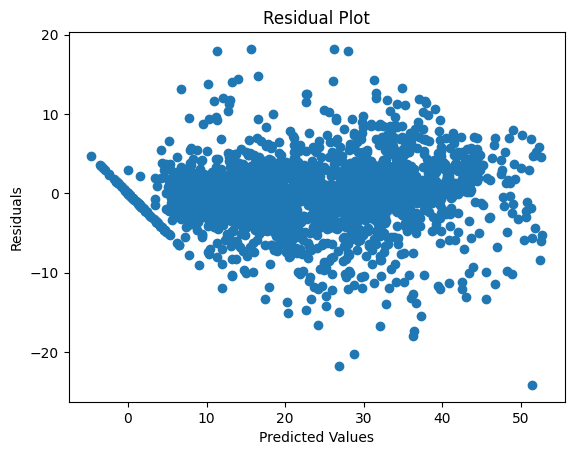

In [262]:
### Heteroscadacity
plt.scatter((y_pred_g_g),(y_test)-(y_pred_g_g))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [263]:
gb_optimal_model.feature_importances_


array([3.25813609e-01, 1.66184458e-01, 3.78721630e-03, 4.09623877e-03,
       3.28932288e-02, 4.50541968e-02, 7.98448284e-04, 9.51992017e-04,
       8.54069319e-03, 1.81875183e-02, 3.10713609e-02, 2.59197728e-02,
       5.93573123e-03, 1.43542164e-03, 1.06291115e-02, 1.32591443e-04,
       3.38435426e-03, 1.67700569e-03, 1.41579865e-04, 1.40362248e-04,
       6.60699429e-05, 5.38603055e-05, 1.37075209e-03, 8.50147844e-03,
       3.14274915e-02, 1.93861025e-02, 1.23772671e-02, 1.53065819e-02,
       1.02596640e-02, 1.05753141e-03, 5.38943634e-03, 1.02923891e-03,
       2.48962204e-02, 3.29084351e-03, 1.65542814e-01, 6.23904839e-05,
       1.01158121e-03, 3.11852651e-04, 1.01221260e-03, 2.27500699e-03,
       3.73917818e-04, 8.45022670e-04, 5.30254509e-04, 2.33352993e-03,
       2.16145054e-03, 1.45956602e-04, 2.20658033e-03])

# **FEATURES STORED**

In [264]:

importances = gb_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [265]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [266]:
importance_df.head()

,Feature,Feature Importance
0,Temperature,0.33
1,Humidity,0.17
2,Wind_speed,0.00
3,Visibility,0.00
4,Solar_Radiation,0.03


In [267]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
0,Temperature,0.33
1,Humidity,0.17
34,Functioning_Day_Yes,0.17
5,Rainfall,0.05
4,Solar_Radiation,0.03
10,Hour_4,0.03
11,Hour_5,0.03
24,Hour_18,0.03
32,Seasons_Winter,0.02
27,Hour_21,0.02


In [268]:
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [269]:

features = X_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

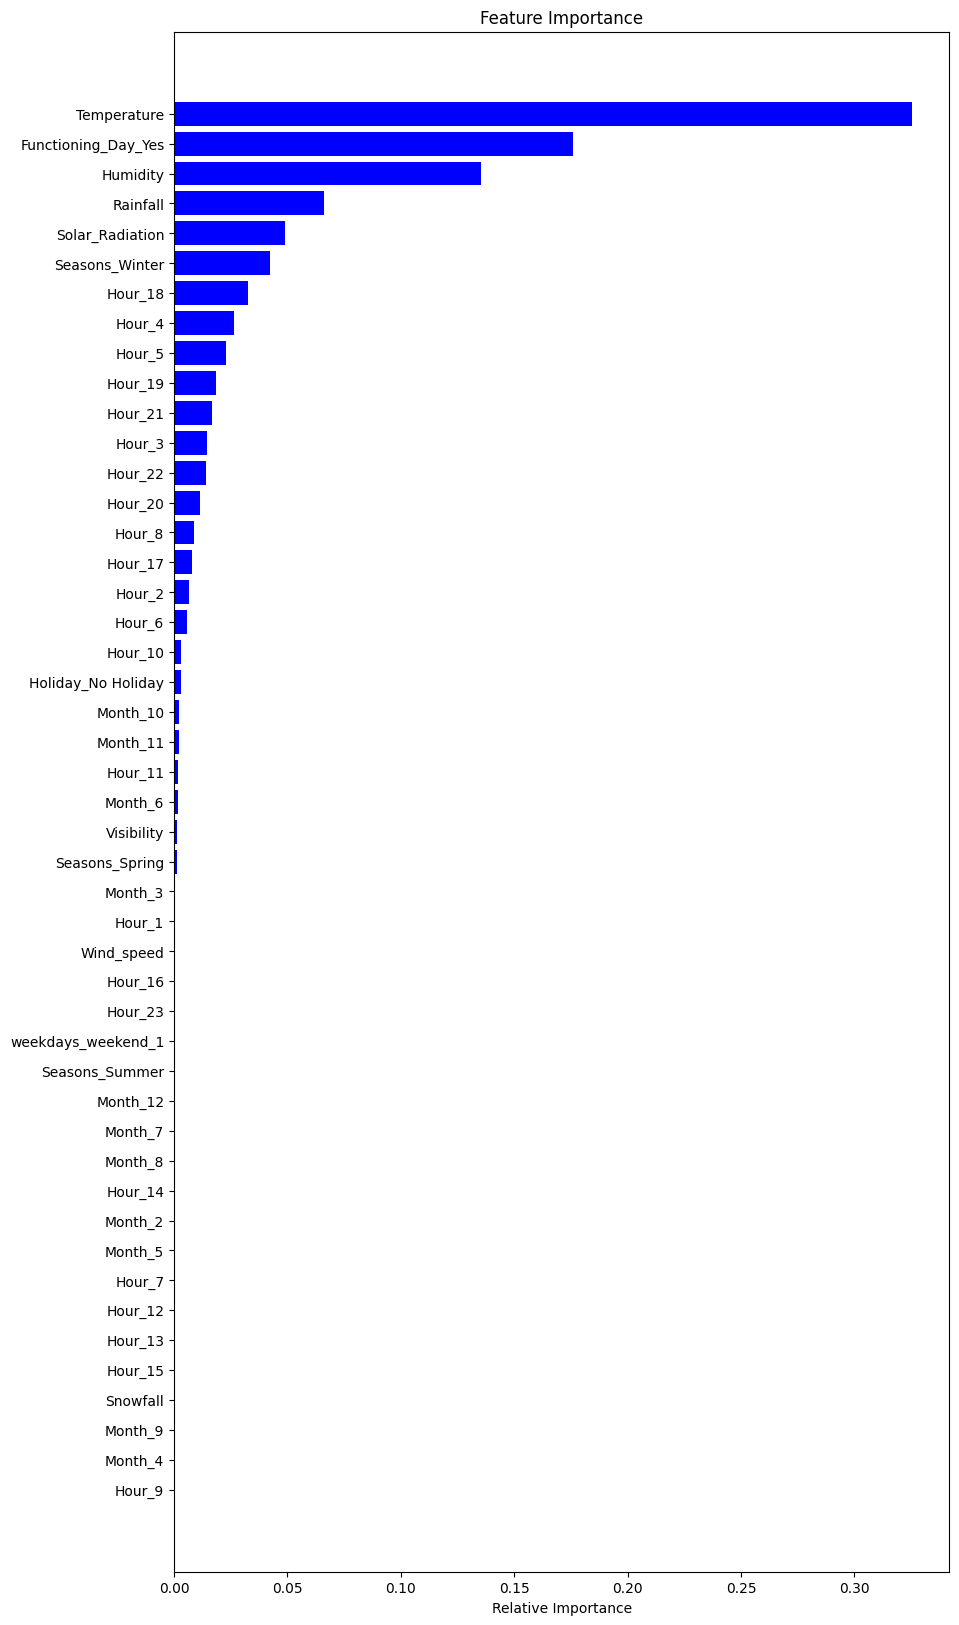

In [270]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# **Conclusion**


During our analysis, we conducted an initial exploratory data analysis (EDA) on all the features in our dataset. Firstly, we analysed our dependent variable 'Rented Bike count' and applied transformations as necessar. We then examined the categorical variables and removed those with majority of one class. We also studied the numerical variables, calculated their correlations, distribution and the their relationships with the dependent variable. Additionally we removed some numerical features that contained mostly 0 values and applied one-hot encoding to the categorical variables.
Subsequently, we employed 7 machine learning algorithms including Linear Regression,Lasso , Ridge, Elastic Net, Decision Tree, Random Forest and Gradient Booster. We also performed hyperparameter tuning to enhance the performance of our models. The evaluation of our models resulted in the following findings :



In [271]:
# displaying the results of evaluation metric values for all models
result=pd.concat([training_df,test_df],keys=['Training set','Test set'])
result

Model    MAE     MSE   RMSE  \
Training set 0               Linear regression   4.425  33.858  5.819   
             1                Lasso regression   7.305  92.646  9.625   
             2                Ridge regression   4.426  33.858  5.819   
             3          Elastic net regression   5.742  56.518  7.518   
             4        Dicision tree regression   5.010  48.013  6.929   
             5        Random forest regression   1.035   2.406  1.551   
             6  Gradient Boosting gridsearchcv   2.561  12.528  3.539   
Test set     0               Linear regression   4.433  33.518  5.789   
             1                Lasso regression   7.506  97.803  9.890   
             2                Ridge regression   4.433  33.520  5.790   
             3      Elastic net regression Test  5.742  56.518  7.518   
             4        Dicision tree regression   5.130  51.435  7.172   
             5        Random forest regression   2.792  17.955  4.237   
             6    Gradient boosting regression   3.707  24.192  4.919   
             7  Gradient Boosting gridsearchcv   3.068  18.379  4.287   

                R2_score  Adjusted R2  
Training set 0     0.780         0.78  
             1     0.398         0.39  
             2     0.780         0.78  
             3     0.633         0.62  
             4     0.688         0.68  
             5     0.984         0.98  
             6     0.919         0.92  
Test set     0     0.788         0.78  
             1     0.381         0.37  
             2     0.788         0.78  
             3     0.633         0.62  
             4     0.674         0.67  
             5     0.886         0.88  
             6     0.847         0.84  
             7     0.884         0.88

We train a model to predict the number of rented bike count in given weather conditions. First, we do Exploratory Data Analysis on the data set. We look for null values that is not found in dataset and outliers and appropriately modify them. We also perform correlation analysis to extract out the important and relevant feature set and later perform feature engineering.

Gradient Boosting gridsearchcv model shows promising result with R2 score of 0.91, therefore it can be used to solve this problem.
Temperatue, Functioning_Day_Yes, Humidity, Rainfall and Solar radiation are major driving factors for the Bike rent demand.
Bike demand shows peek around 8-9 AM in the morning and 6 - 7pm in the evening.
People prefer to rent bike more in summer than in winter.
Bike demand is more on clear days than on snowy or rainy days.
Temperature range from 22 to 25(°C) has more demand for bike.
Although the current analysis may be insightful, it is important to note that the dataset is time-dependent and variables such as temperature, windspeed and solar radiation may not always remain consistent. As a result there may be situations where the model fails to perform well. As field of machine learning is constantly evolving, it is necessary to stay up-to-date with the latest developments and be prepared to handle unexpected scenarios. Maintaining a strong understanding of Machine Learning concepts will undoubtely provide an advantage in staying ahead in the future.